<a href="https://colab.research.google.com/github/rob3rtopassos/estudos/blob/main/2025_01_Analise_espectral_Atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2025/01 Análise Espectral

## Aluno: Roberto Passos de Oliveira
---

# **Atividade 01 de 13/05/2025**

1. Fazer o gráfico do atrator 3D :
2. Fazer a analise SSA, guardando o grafico dos autovalores
3. Reconstruir a serie com apenas 1 componente principal
4. Fazer o atrator da serie reconstruida usando o mesmo tempo de defasagem

---


# 0. 📥 Importação e Visualização Inicial dos Dados

O primeiro passo é importar a série temporal que será analisada.  


**Objetivo:**  
- Carregar os dados
- Verificar formato e estrutura
- Visualizar um gráfico simples da série temporal

## Importando Pacores

In [ ]:
# Contar tempo de execução
inicio <- Sys.time()

In [ ]:
# Install the necessary packages if they are not already installed
if (!require("plotly")) install.packages("plotly")
if (!require("magrittr")) install.packages("magrittr")
if (!require("htmlwidgets")) install.packages("htmlwidgets")


# Load the libraries
library(plotly)
library(magrittr)
library(htmlwidgets)

Loading required package: plotly

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotly’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Loading required package: magrittr

Loading required package: htmlwidgets

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




## Importando os dados

In [ ]:
#Exemplo de temperaturas de CBA
#dados <- read.csv("/content/T Est Cuiaba.txt", sep = "\t")
dados <- read.csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR6USc6ve6wR6rm14WcdE5V5V4QeF_ZSBojjsvTM-kPipWijCxAVBYLnR4AEiSwgsrAM9mlLNYiLpyt/pub?gid=377590826&single=true&output=csv', dec = ",")


# Visualize os primeiros registros do DataFrame
head(dados)


,A,B
,<dbl>,<dbl>
1,27.0,27.0
2,28.2,28.2
3,35.1,35.1
4,29.6,29.6
5,27.9,27.9
6,35.6,35.6


## Caracteristicas dos dados importados

In [ ]:
# Descrição dos dados com quebra de linha para separação

# Verifique as dimensões do dataframe
cat("\n")
print("Verificando as dimensões do dataframe:")
dim(dados)

# Resumo estatístico das variáveis numéricas
cat("\n")
print("Resumo estatístico das variáveis numéricas:")
summary(dados)

# Estrutura do dataframe, incluindo tipos de dados de cada coluna
cat("\n")
print("Estrutura do dataframe e tipos de dados:")
str(dados)

# Verifique os nomes das colunas
cat("\n")
print("Nomes das colunas do dataframe:")
names(dados)

# Contagem de valores ausentes por coluna
cat("\n")
print("Contagem de valores ausentes por coluna:")
colSums(is.na(dados))

# Tipos de dados das colunas
cat("\n")
print("Tipos de dados das colunas:")
sapply(dados, class)

# Exibir algumas linhas aleatórias do conjunto de dados para inspeção visual
cat("\n")
print("Exibindo algumas linhas aleatórias do conjunto de dados:")
dados[sample(nrow(dados), 5), ]



[1] "Verificando as dimensões do dataframe:"


[1] 22641     2


[1] "Resumo estatístico das variáveis numéricas:"


       A               B        
 Min.   : 1.80   Min.   : 1.80  
 1st Qu.:25.10   1st Qu.:25.10  
 Median :27.20   Median :27.20  
 Mean   :27.69   Mean   :27.69  
 3rd Qu.:30.60   3rd Qu.:30.60  
 Max.   :41.60   Max.   :41.60  


[1] "Estrutura do dataframe e tipos de dados:"
'data.frame':	22641 obs. of  2 variables:
 $ A: num  27 28.2 35.1 29.6 27.9 35.6 25.8 28.4 35.3 29.6 ...
 $ B: num  27 28.2 35.1 29.6 27.9 35.6 25.8 28.4 35.3 29.6 ...

[1] "Nomes das colunas do dataframe:"


[1] "A" "B"


[1] "Contagem de valores ausentes por coluna:"


A B 
0 0


[1] "Tipos de dados das colunas:"


A         B 
"numeric" "numeric"


[1] "Exibindo algumas linhas aleatórias do conjunto de dados:"


,A,B
,<dbl>,<dbl>
1353,33.0,33.0
4313,20.1,20.1
2151,26.4,26.4
7408,29.0,29.0
9708,33.1,33.1


##Transformação de Dados


In [ ]:
#Para facilitar a integração com os scripts já usados os dados são salvos em uma variavel padrão
dados <-data.frame(V1 = dados$A)

# Visualizar as primeiras linhas do DataFrame para verificar as conversões
head(dados)

,V1
,<dbl>
1,27.0
2,28.2
3,35.1
4,29.6
5,27.9
6,35.6


## Representação Gráfica da Variável Medida Ao Longo do Tempo

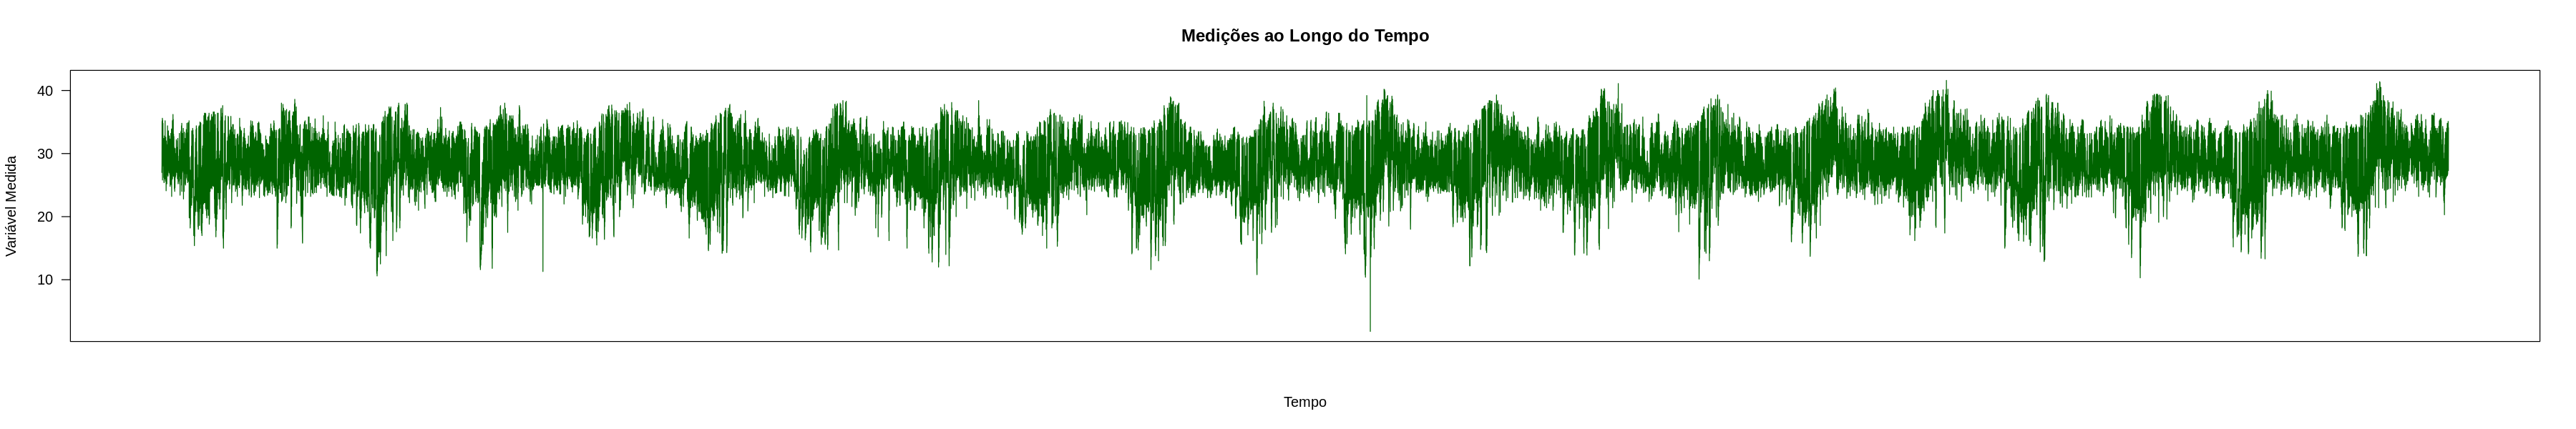

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 5)

plot(dados$V1, type = "l", col = "darkgreen",
     main = "Medições ao Longo do Tempo",
     xlab = "Tempo", ylab = "Variável Medida", xaxt = "n", yaxt = "n")

# Adiciona apenas o eixo Y manualmente
axis(2, las = 1, col = "black")  # Eixo Y sem alterar o visual da linha

## COMENTÁRIO:

O banco de dados possui 22.6412 registros de 3 medições de temperatura por dia,
ou seja os dados representam aproximadamente 20 anos de medições de temperarura.

Ao visualizar os dados originais em um gráfico é possivel perceber picos e vales que devem representar a sasonalizada anual, porem há ruido representado pelo "sobe e desce frenético" dos dados aferidos.

---

# 📈 1 Visualização do Atrator 3D da Série Original

Antes de qualquer decomposição, é importante visualizar a estrutura dinâmica da série no espaço de fase.

**Objetivo:** Construir o atrator tridimensional usando a série original.  
**Parâmetros necessários:**  
- Tempo de defasagem (`τ`)
- Dimensão de imersão (`m`)


## Tempo de defasagem (`τ`) Série Original

In [ ]:
# OBS: Os dados devem estar dispostos em duas colunas com headers A e B

#Exemplo com Temperatura
info_mutua <- data.frame(A = dados$V1, B = dados$V1)

# Print the head of the new data frame
head(info_mutua) # Use head() to display the first few rows of the data frame

,A,B
,<dbl>,<dbl>
1,27.0,27.0
2,28.2,28.2
3,35.1,35.1
4,29.6,29.6
5,27.9,27.9
6,35.6,35.6


Número total de pontos de dados: 22641 
Número de intervalos (bins): 20 
Máximo atraso (tao) testado: 50 
Intervalo de valores para A: [ 1.8 , 41.6 ]
Intervalo de valores para B: [ 1.8 , 41.6 ]
Iniciando cálculo da Informação Mútua para tao de -50 a 50 ...
  Processado tao = -50 , MI = 0.0652 
  Processado tao = -40 , MI = 0.0781 
  Processado tao = -30 , MI = 0.2117 
  Processado tao = -20 , MI = 0.0693 
  Processado tao = -10 , MI = 0.0774 
  Processado tao = 0 , MI = 2.1916 
  Processado tao = 10 , MI = 0.0774 
  Processado tao = 20 , MI = 0.0693 
  Processado tao = 30 , MI = 0.2117 
  Processado tao = 40 , MI = 0.0781 
  Processado tao = 50 , MI = 0.0652 
Cálculo da Informação Mútua concluído.

--- Resultados ---
Valor Máximo da Informação Mútua: 2.19163 
Atraso (tao) correspondente: 0 
Primeiro Valor Mínimo Positivo da Informação Mútua: 0.1572 
Atraso (tao) correspondente: 2 
Gerando gráfico da Informação Mútua vs. Atraso (tao)...
Salvando resultados em: Inf_Mutua_Resultados.txt 


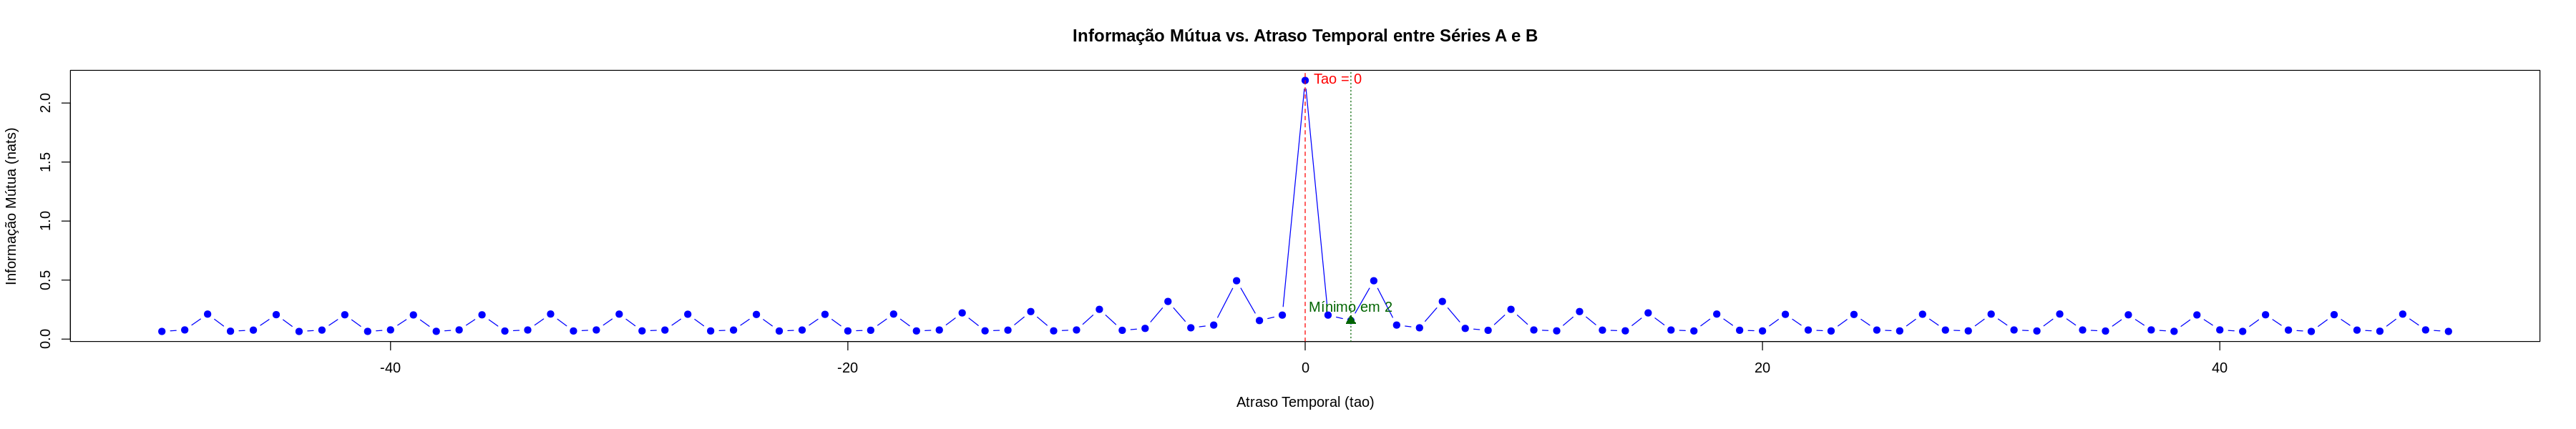

In [ ]:
#--------------------------------------------------------------------------
# CÁLCULO DA INFORMAÇÃO MÚTUA COM ATRASO TEMPORAL (TIME-LAGGED)
#--------------------------------------------------------------------------
# Objetivo: Calcular a Informação Mútua entre duas séries temporais (A e B)
#           para diferentes atrasos temporais (tao), a fim de encontrar o
#           atraso que maximiza a dependência estatística entre elas.
#
# Input: Um data frame chamado 'info_mutua' deve existir no ambiente R.
#        Este data frame deve conter duas colunas nomeadas exatamente "A" e "B",
#        representando as duas séries temporais.
#
# Exemplo de como 'info_mutua' deve ser:
#        A         B
#   1.2345    6.7890
#   1.3456    6.5678
#   1.1111    6.9999
#   ...       ...
#
# Output:
#   - Impressão do valor máximo da Informação Mútua encontrado.
#   - Impressão do valor do atraso (tao) onde a IM foi máxima.
#   - Um gráfico da Informação Mútua vs. Atraso (tao).
#   - Um arquivo de texto "Inf_Mutua_Resultados.txt" com os valores de
#     tao e da Informação Mútua (potencialmente renormalizada).
#--------------------------------------------------------------------------

# --- CONFIGURAÇÃO INICIAL ---

# Assume que o data frame 'info_mutua' já está carregado no ambiente R.
# Se precisar ler de um arquivo (ex: CSV separado por tabulação com cabeçalho):
# setwd("C:/Caminho/Para/Sua/Pasta") # Define o diretório de trabalho
# data <- read.csv('nome_do_arquivo.txt', header = TRUE, sep = "\t")
# colnames(data) <- c("A", "B") # Garante que os nomes das colunas são A e B

# Usaremos 'data' como o nome do data frame daqui em diante
data <- info_mutua # Certifique-se que 'info_mutua' existe!

num_points <- nrow(data) # Número total de pontos de dados em cada série

# --- PARÂMETROS ---

# Número de intervalos (bins) para discretizar os dados.
# Um número maior captura mais detalhes, mas exige mais dados.
num_bins <- 20

# Máximo atraso temporal (tao) a ser testado (positivo e negativo).
# O código testará atrasos de -max_lag até +max_lag.
max_lag <- 50

# Validação inicial: verificar se há dados suficientes
if (num_points <= max_lag) {
  stop("Erro: Número de pontos de dados insuficiente para o max_lag definido.")
}
if (ncol(data) < 2 || !all(c("A", "B") %in% colnames(data))) {
    stop("Erro: O data frame 'data' deve ter colunas chamadas 'A' e 'B'.")
}


cat("Número total de pontos de dados:", num_points, "\n")
cat("Número de intervalos (bins):", num_bins, "\n")
cat("Máximo atraso (tao) testado:", max_lag, "\n")

# --- CÁLCULO DOS LIMITES E LARGURA DOS INTERVALOS ---

# Encontra os valores mínimo e máximo para as séries A e B
# Usando funções R em vez de loop para eficiência e clareza
min_A <- min(data$A, na.rm = TRUE)
max_A <- max(data$A, na.rm = TRUE)
min_B <- min(data$B, na.rm = TRUE)
max_B <- max(data$B, na.rm = TRUE)

cat("Intervalo de valores para A: [", min_A, ",", max_A, "]\n")
cat("Intervalo de valores para B: [", min_B, ",", max_B, "]\n")

# Calcula a largura de cada intervalo (bin) para A e B
# Adiciona um pequeno epsilon para garantir que o valor máximo caia no último bin
epsilon <- 1e-9 # Pequeno valor para evitar problemas de ponto flutuante
delta_A <- (max_A - min_A + epsilon) / num_bins
delta_B <- (max_B - min_B + epsilon) / num_bins

# Verifica se os intervalos têm largura > 0 (evita divisão por zero se todos os valores forem iguais)
if (delta_A <= 0 || delta_B <= 0) {
    stop("Erro: Uma das séries (A ou B) parece ter todos os valores iguais. Não é possível calcular os bins.")
}

# --- CÁLCULO DA INFORMAÇÃO MÚTUA PARA CADA ATRASO (tao) ---

# Vetor para armazenar os resultados da Informação Mútua para cada tao
# O tamanho é 2*max_lag + 1 para cobrir de -max_lag a +max_lag, incluindo 0.
mutual_info_results <- rep(0.0, times = 2 * max_lag + 1)
lags_tested <- -max_lag:max_lag # Vetor com os valores de tao que serão testados

cat("Iniciando cálculo da Informação Mútua para tao de", -max_lag, "a", max_lag, "...\n")

# Loop principal: itera sobre cada valor de atraso (tao)
for (tao_index in 1:length(lags_tested)) {

  tao <- lags_tested[tao_index]

  # --- Inicialização das contagens para o tao atual ---
  # Vetores para contagem de ocorrências em cada bin para A e B (Histogramas Marginais)
  count_A <- rep(0, times = num_bins)
  count_B <- rep(0, times = num_bins)
  # Matriz para contagem de ocorrências conjuntas (Histograma Conjunto)
  count_AB <- matrix(0, nrow = num_bins, ncol = num_bins)

  # Número de pares (A[t], B[t+tao]) que serão comparados para este tao específico
  num_comparisons <- 0

  # --- Contagem de ocorrências nos bins (Discretização) ---
  # O loop itera sobre os índices 't' da série temporal A
  # Os limites do loop garantem que tanto t quanto t+tao estejam dentro dos limites dos dados

  if (tao >= 0) {
    # Para tao >= 0, comparamos A[t] com B[t + tao]
    # t vai de 1 até num_points - tao
    for (t in 1:(num_points - tao)) {
      index_A <- t
      index_B <- t + tao

      # Pega os valores atuais
      value_A <- data$A[index_A]
      value_B <- data$B[index_B]

      # Encontra o índice do bin para A e B
      # floor(...) garante que obtenhamos um índice inteiro de 0 a num_bins-1
      # +1 ajusta para o índice R (que começa em 1)
      bin_index_A <- floor((value_A - min_A) / delta_A) + 1
      bin_index_B <- floor((value_B - min_B) / delta_B) + 1

      # Garante que os índices estejam dentro dos limites [1, num_bins]
      # (Necessário especialmente para o valor máximo exato)
      bin_index_A <- max(1, min(bin_index_A, num_bins))
      bin_index_B <- max(1, min(bin_index_B, num_bins))

      # Incrementa as contagens
      count_A[bin_index_A] <- count_A[bin_index_A] + 1
      count_B[bin_index_B] <- count_B[bin_index_B] + 1
      count_AB[bin_index_A, bin_index_B] <- count_AB[bin_index_A, bin_index_B] + 1
      num_comparisons <- num_comparisons + 1
    }
  } else { # tao < 0
    # Para tao < 0, comparamos A[t - tao] com B[t] (equivalente a A[t'] com B[t' + tao])
    # t vai de 1 - tao até num_points
    for (t in (1 - tao):num_points) {
      index_A <- t + tao # Lembre-se que tao é negativo aqui
      index_B <- t

      # Pega os valores atuais
      value_A <- data$A[index_A]
      value_B <- data$B[index_B]

      # Encontra o índice do bin para A e B
      bin_index_A <- floor((value_A - min_A) / delta_A) + 1
      bin_index_B <- floor((value_B - min_B) / delta_B) + 1

      # Garante que os índices estejam dentro dos limites [1, num_bins]
      bin_index_A <- max(1, min(bin_index_A, num_bins))
      bin_index_B <- max(1, min(bin_index_B, num_bins))

      # Incrementa as contagens
      count_A[bin_index_A] <- count_A[bin_index_A] + 1
      count_B[bin_index_B] <- count_B[bin_index_B] + 1
      count_AB[bin_index_A, bin_index_B] <- count_AB[bin_index_A, bin_index_B] + 1
      num_comparisons <- num_comparisons + 1
    }
  }

  # --- Cálculo das Probabilidades ---
  # Normaliza as contagens pelo número total de comparações feitas *para este tao*
  if (num_comparisons > 0) {
    prob_A <- count_A / num_comparisons
    prob_B <- count_B / num_comparisons
    prob_AB <- count_AB / num_comparisons
  } else {
    # Se não houve comparações (caso extremo, talvez max_lag muito grande)
    prob_A <- rep(0, num_bins)
    prob_B <- rep(0, num_bins)
    prob_AB <- matrix(0, num_bins, num_bins)
  }

  # --- Cálculo da Informação Mútua para o tao atual ---
  mutual_info_tao <- 0.0
  for (i in 1:num_bins) {
    for (k in 1:num_bins) {
      # Verifica se as probabilidades marginais e a conjunta são maiores que zero
      # para evitar log(0) ou divisão por zero.
      if (prob_AB[i, k] > 0 && prob_A[i] > 0 && prob_B[k] > 0) {
        mutual_info_tao <- mutual_info_tao + prob_AB[i, k] * log(prob_AB[i, k] / (prob_A[i] * prob_B[k]))
      }
    }
  }

  # Armazena o resultado da Informação Mútua para este tao
  # O índice no vetor 'mutual_info_results' corresponde à posição de 'tao' em 'lags_tested'
  mutual_info_results[tao_index] <- mutual_info_tao

  # Imprime progresso (opcional, pode ser útil para execuções longas)
  if (tao %% 10 == 0) { # Imprime a cada 10 lags
      cat("  Processado tao =", tao, ", MI =", round(mutual_info_tao, 4), "\n")
  }

} # Fim do loop sobre tao

cat("Cálculo da Informação Mútua concluído.\n")

# --- ANÁLISE DOS RESULTADOS ---

# Encontra o valor máximo da Informação Mútua e o índice correspondente
max_mutual_info_value <- max(mutual_info_results, na.rm = TRUE)
max_mutual_info_index <- which.max(mutual_info_results)

# Encontra o valor do atraso (tao) que corresponde ao máximo
lag_at_max_mi <- lags_tested[max_mutual_info_index]

cat("\n--- Resultados ---\n")
cat("Valor Máximo da Informação Mútua:", max_mutual_info_value, "\n")
cat("Atraso (tao) correspondente:", lag_at_max_mi, "\n")

# --- ENCONTRA O PRIMEIRO MÍNIMO LOCAL APÓS O MÁXIMO ---
min_lag_after_peak <- NA
min_mi_value <- NA

# Começa a busca logo após o índice do pico
for (i in (max_mutual_info_index + 1):(length(mutual_info_results) - 1)) {
  if (mutual_info_results[i - 1] > mutual_info_results[i] &&
      mutual_info_results[i + 1] > mutual_info_results[i]) {

    min_lag_after_peak <- lags_tested[i]
    min_mi_value <- mutual_info_results[i]
    break
  }
}

# Mostra o resultado, se encontrado
if (!is.na(min_lag_after_peak)) {
  cat("Primeiro Valor Mínimo Positivo da Informação Mútua:", round(min_mi_value, 4), "\n")
  cat("Atraso (tao) correspondente:", min_lag_after_peak, "\n")
} else {
  cat("Nenhum mínimo local encontrado após o máximo da Informação Mútua.\n")
}

# --- RENORMALIZAÇÃO (Opcional, como no código original) ---
# Esta etapa divide todos os valores de IM pelo valor máximo, forçando o pico a ser 1.
# Isso pode ser útil para comparação visual, mas altera as unidades originais da IM (nats ou bits).
# Decida se você realmente precisa disso. O padrão é manter como está (sem renormalizar).

renormalize <- FALSE # Mude para TRUE se quiser renormalizar
mutual_info_to_plot <- mutual_info_results # Por padrão, usa os valores calculados

if (renormalize && max_mutual_info_value > 0) {
  cat("Renormalizando os resultados da Informação Mútua (pico = 1).\n")
  mutual_info_to_plot <- mutual_info_results / max_mutual_info_value
  # Atualiza o valor máximo reportado se renormalizado (será 1)
  # max_mutual_info_value <- 1.0
} else if (renormalize) {
    cat("Aviso: Não foi possível renormalizar pois o máximo IM é zero ou negativo.\n")
}


# --- PLOTAGEM DOS RESULTADOS ---

cat("Gerando gráfico da Informação Mútua vs. Atraso (tao)...\n")

plot(lags_tested, mutual_info_to_plot,
     type = "b", # 'b' para pontos e linhas
     pch = 19,   # Símbolo do ponto (círculo sólido)
     col = "blue",
     xlab = "Atraso Temporal (tao)",
     ylab = ifelse(renormalize, "Informação Mútua (Renormalizada)", "Informação Mútua (nats)"),
     main = "Informação Mútua vs. Atraso Temporal entre Séries A e B")

# Adiciona uma linha vertical no pico (onde a IM é máxima)
abline(v = lag_at_max_mi, col = "red", lty = 2) # Linha vertical tracejada vermelha
# Se encontrou o mínimo local, destaque também no gráfico
if (!is.na(min_lag_after_peak)) {
  abline(v = min_lag_after_peak, col = "darkgreen", lty = 3)
  points(min_lag_after_peak, min_mi_value, col = "darkgreen", pch = 17, cex = 1.2)
  text(min_lag_after_peak, min_mi_value,
       labels = paste("Mínimo em", min_lag_after_peak), pos = 3, col = "darkgreen")
}
# Adiciona texto indicando o pico
text(lag_at_max_mi, max(mutual_info_to_plot, na.rm=TRUE),
     labels = paste("Tao =", lag_at_max_mi), pos = 4, col = "red") # pos=4 é à direita

# --- SALVAR RESULTADOS ---

# Cria um data frame com os resultados
results_df <- data.frame(Tao = lags_tested, Mutual_Information = mutual_info_to_plot)

# Nome do arquivo de saída
output_filename <- "Inf_Mutua_Resultados.txt"

cat("Salvando resultados em:", output_filename, "\n")
# Salva em um arquivo de texto separado por espaços
write.table(results_df,
            file = output_filename,
            sep = " ",           # Separador de colunas
            row.names = FALSE,   # Não incluir nomes das linhas
            col.names = TRUE,    # Incluir nomes das colunas (Tao, Mutual_Information)
            quote = FALSE,       # Não colocar aspas em torno dos valores/nomes
            eol = "\n")          # Fim de linha padrão

cat("--- Fim do Script ---\n")

## COMENTÁRIO

O cálculo da  Informação Mútua entre duas séries temporais (A e B) encontro o primeiro minimo em 2. Porem em 8 observamos o atraso temporal (tao), que maximiza a dependência estatística entre as series.

Assim será utilizado o tempode de defasegem 8 para construir o atrator

---

## Espaço de Fase da Série Original

Nesta etapa, a série temporal original é transformada em um espaço de fase, permitindo a visualização da dinâmica do sistema em múltiplas dimensões. Para isso, são definidos dois parâmetros essenciais: o atraso (𝜏), que determina o espaçamento entre os pontos da reconstrução, e a dimensão de embedding (𝑚), que define o número de variáveis presentes no novo espaço. Com base nesses parâmetros, cada ponto da série temporal é reorganizado em uma matriz, onde as colunas representam diferentes momentos no tempo. Esse processo possibilita a análise da evolução do sistema ao longo do tempo, permitindo identificar padrões e estruturas ocultas nos dados.

In [ ]:
# 1. Criar uma série temporal de exemplo
#set.seed(123)
#serie_temporal <- sin(1:1000 * 0.05) + rnorm(1000, 0, 0.1)

#Dados Reais
serie_temporal <- dados$V1

# 2. Definir parâmetros de reconstrução
atraso <- 8   # tau - caso queira definir o valor
#atraso <- min_lag_after_peak #Atraso TAO obtido no CÁLCULO DA INFORMAÇÃO MÚTUA COM ATRASO TEMPORAL (TIME-LAGGED)

dimensao <- 3  # m - caso queira definir o valor
#dimensao <- saturou_em #Calculo d dimensão de correlação (D2) para diferentes dimensões de embedding (m)

# 3. Função para reconstruir o espaço de fase
reconstruir_espaco_fase <- function(serie, dimensao, atraso) {
  n <- length(serie)
  max_indice <- n - (dimensao - 1) * atraso
  if (max_indice <= 0) {
    stop("A série é muito curta para a combinação de 'dimensao' e 'atraso' fornecidos.")
  }
  matriz_embed <- sapply(0:(dimensao - 1), function(i) {
    serie[seq(1 + i * atraso, length.out = max_indice)]
  })
  colnames(matriz_embed) <- paste0("T", 1:dimensao)
  as.data.frame(matriz_embed)
}

# 4. Aplicar a função para obter o espaço de fase
espaco_fase_df <- reconstruir_espaco_fase(serie_temporal, dimensao, atraso)

# Imprimir os valores utilizados
cat("Valor de atraso (tau):", atraso, "\n")
cat("Valor de dimensão (m):", dimensao, "\n")

# Mostrar as primeiras linhas do espaço de fase
head(espaco_fase_df)

# Salvar o DataFrame em um arquivo CSV
write.csv(espaco_fase_df, "espaco_fase.csv", row.names = FALSE)

Valor de atraso (tau): 8 
Valor de dimensão (m): 3 


,T1,T2,T3
,<dbl>,<dbl>,<dbl>
1,27.0,35.3,28.0
2,28.2,29.6,31.6
3,35.1,28.6,26.2
4,29.6,34.8,26.8
5,27.9,28.3,32.4
6,35.6,29.8,25.4


## 📊 Gráfico 3D Série Original - Reconstrução do espaço de fase

**Visualizar o espaço de fase em 3D.** Embora o espaço reconstruído pode ter mais de 3 dimensões, é possivel escolher **3 quaisquer** dimensões para gerar o gráfico 3D.

O gráfico ajuda a:
- Detectar **atratores** (como o atrator de Lorenz ou atratores estranhos).
- Avaliar **padrões recorrentes** no comportamento da série.
- Ter uma **intuição visual** sobre a estrutura do sistema dinâmico.
---

In [ ]:
# Use system() to execute shell commands in R
system("sudo apt-get update")
system("sudo apt-get install pandoc -y")


# Criar gráfico com plotly (usando espaco_fase_df)
grafico_3d <- plot_ly(
  data = espaco_fase_df,
  x = ~T1, y = ~T2, z = ~T3,
  type = 'scatter3d',
  mode = 'markers',
  marker = list(size = 2, color = 'darkgoldenrod')
) %>%
  layout(
    scene = list(
      xaxis = list(title = "T(t)"),
      yaxis = list(title = "T(t+τ)"),
      zaxis = list(title = "T(t+2τ)")
    )
  )
# Salvar como HTML
htmlwidgets::saveWidget(grafico_3d, "grafico_3d.html", selfcontained = TRUE)

# Mensagem informando o caminho
cat("\n✅ Gráfico 3D salvo com sucesso como 'grafico_3d.html'\n")
cat("
📥 Como baixar o gráfico `grafico_3d.html` no Google Colab:

1. Clique no ícone de 📂 Arquivos (barra lateral esquerda do Colab).
2. Encontre o arquivo grafico_3d.html na lista.
3. Clique com o botão direito sobre o arquivo.
4. Selecione \"Download\".

💡 Dica: o gráfico será interativo ao abrir no navegador!
")


✅ Gráfico 3D salvo com sucesso como 'grafico_3d.html'

📥 Como baixar o gráfico `grafico_3d.html` no Google Colab:

1. Clique no ícone de 📂 Arquivos (barra lateral esquerda do Colab).
2. Encontre o arquivo grafico_3d.html na lista.
3. Clique com o botão direito sobre o arquivo.
4. Selecione "Download".

💡 Dica: o gráfico será interativo ao abrir no navegador!


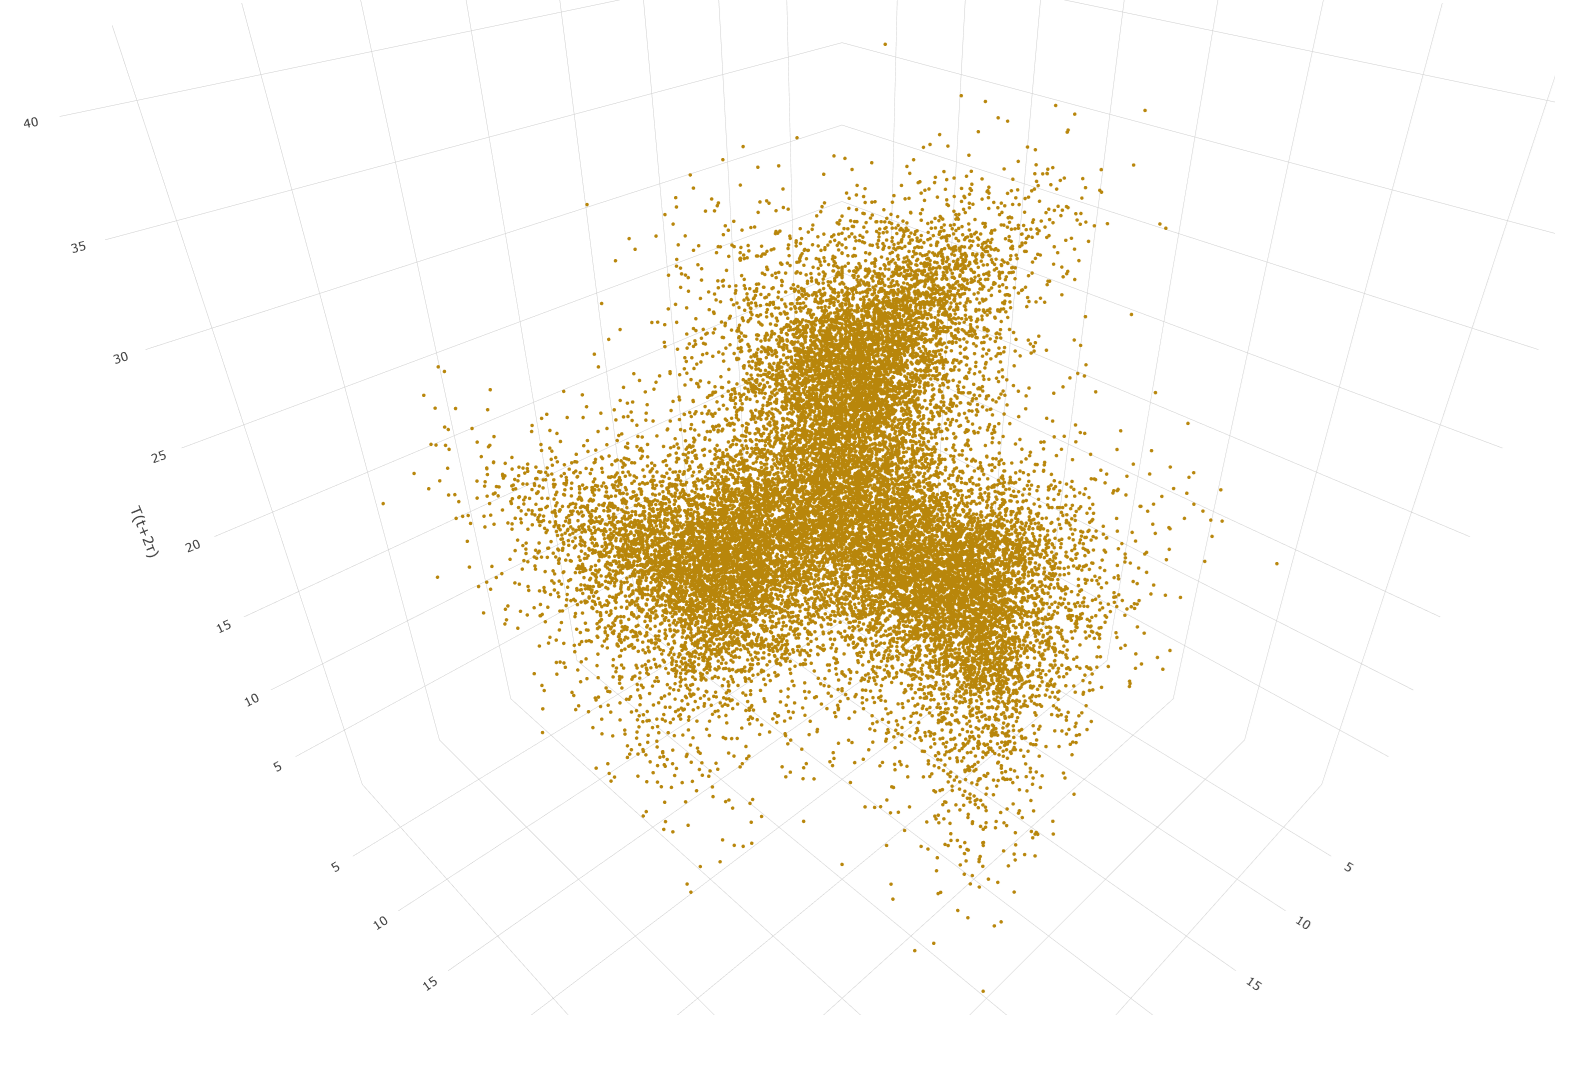

## COMETÁRIO:
O gráfico mostra a reconstrução do espaço de fase da série de temperatura, com cerca de 22.000 observações e três medições por dia. A presença de três “braços” pode estar relacionada justamente ao número de registros diários, pois as variações dentro do próprio dia são captadas na reconstrução. Como os dados ainda não passaram por um tratamento para separar as componentes de menor frequência (por exemplo, com uso de SSA), essas oscilações rápidas acabam dominando o padrão visual do atrator.

---

# 📊 2 Análise SSA - Cálculo e Gráfico dos Autovalores

A Análise SSA permite decompor a série temporal em componentes principais.

**Objetivo:**  
- Aplicar SSA na série original  
- Visualizar o gráfico de autovalores (scree plot) para identificar os componentes dominantes  

**Dica:** Os maiores autovalores geralmente representam padrões periódicos ou tendências importantes.

O numero de observações é: 22641



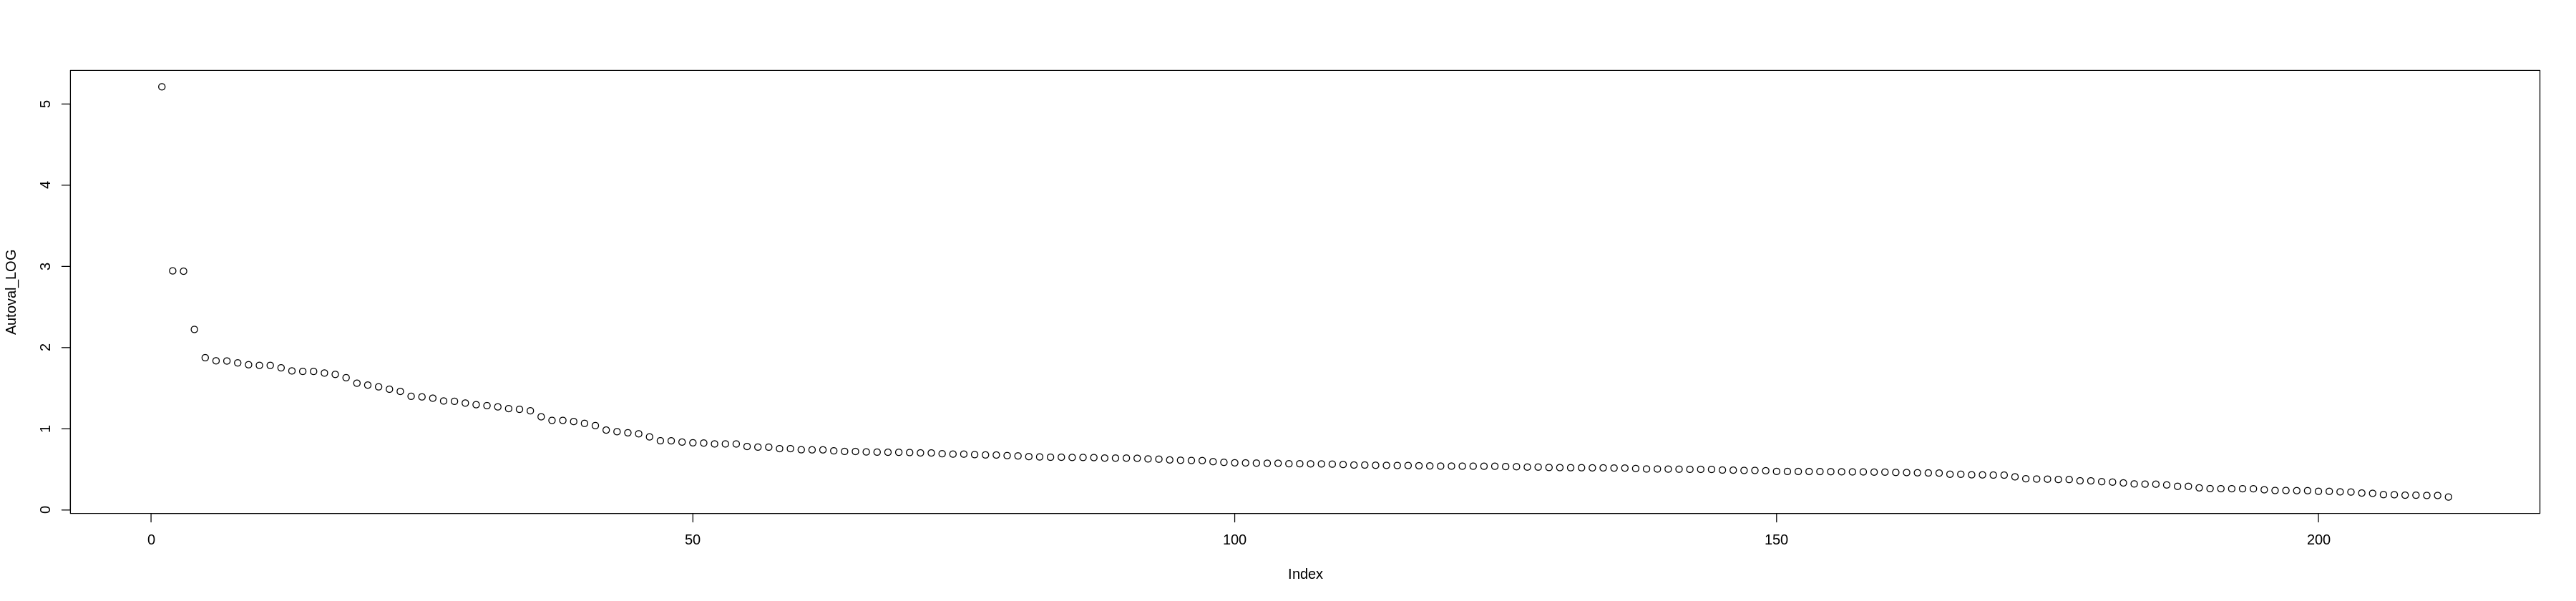

In [ ]:
# SSA - SINGULAR SPECTRUM ANALYSIS
# Cálculo dos autovalores da matriz de correlação construída a partir da série temporal,
# ordenando seus valores absolutos em ordem decrescente e aplicando a transformação logarítmica (log10).
# Em seguida, plota o espectro dos autovalores, evidenciando as componentes principais mais relevantes da série
# e permitindo distinguir sinal de ruído.

# Define o diretório de trabalho
#setwd("C:/Users/Sérgio/Documents/Nossos Artigos/Ambiental/Artigos com Leone/Artigo VPD")

# Carrega os dados do arquivo 'VPD FM.txt' com cabeçalho
#data <- read.csv('VPD FM.txt', header = TRUE)
#head precisa ser X
data <- data.frame(X = dados$V1)

# Ajustar tamanho dos gráficos
options(repr.plot.width = 30, repr.plot.height = 7)

# Obtém o número de linhas/observações nos dados
ndat <- nrow(data)
#print(ndat)
message("O numero de observações é: ", ndat)

# Calcula a dimensão da matriz de correlação (MEM) usando a regra empírica √(2*N)
MEM = as.integer(sqrt(2*ndat))   # Dimensão da matriz de correlação = memória

# Inicializa matriz de correlação com zeros
MCorr <- matrix(0.0, nrow=MEM, ncol=MEM)

# -----------------------------------------------------------
# CÁLCULO DA MATRIZ DE CORRELAÇÃO:
# -----------------------------------------------------------
for (i in 1:MEM) {
  for (j in 1:MEM) {
    soma <- 0.0
    kmax <- ndat - as.integer(abs(i-j))  # Ajusta o limite para evitar extrapolar os dados

    # Calcula a autocorrelação entre as posições i e j
    for(k in 1:kmax) {
      soma <- soma + data$X[k] * data$X[k + as.integer(abs(i-j))]
    }

    # Armazena o valor normalizado da correlação
    MCorr[i,j] <- soma/(ndat - abs(i-j))
  }
  #print(i)  # Mostra progresso
}

# -----------------------------------------------------------
# CÁLCULO DE AUTOVALORES E AUTOVETORES DA MATRIZ DE CORRELAÇÃO
# -----------------------------------------------------------
Autovalores <- rep(0.0, times=MEM)
Autovetores <- matrix(0.0, nrow=MEM, ncol=MEM)

# Calcula autovalores e autovetores usando a função eigen()
#eigen(MCorr) #printa os valores

# Armazena os resultados
Autovalores <- eigen(MCorr)$values
Autovetores <- eigen(MCorr)$vectors

#print(Autovalores)
#Avaliação do gráfico depende de muita esperiencia
#plot(Autovetores[,10])  # Plota o 10º autovetor

# -----------------------------------------------------------
# ORDENA O VALOR ABSOLUTO DOS AUTOVALORES EM ORDEM DECRESCENTE:
# -----------------------------------------------------------
Autoval_ABS <- rep(0.0, times=MEM)
Autoval_LOG <- rep(0.0, times=MEM)

# Calcula valores absolutos dos autovalores
for(j in 1:MEM) {
  Autoval_ABS[j] <- abs(Autovalores[j])
}

# Ordena em ordem decrescente e aplica log10
Autoval_LOG <- sort(Autoval_ABS, decreasing = TRUE)

for(j in 1:MEM) {
  Autoval_LOG[j] <- log10(Autoval_LOG[j])
}

plot(Autoval_LOG)  # Plota o espectro em escala logarítmica

# -----------------------------------------------------------
# CÁLCULO DAS COMPONENTES PRINCIPAIS
# -----------------------------------------------------------
ncomp <- 20  # Número de componentes principais a calcular
PC <- matrix(0.0, nrow=ndat, ncol=ncomp)

# Calcula as componentes principais (PCs)
for (k in 1:ncomp) {
  for (i in 1:ndat) {
    for (j in 1:MEM) {
      # Projeta os dados nos autovetores para obter as PCs
      PC[i,k] <- PC[i,k] + data$X[i+j-1] * Autovetores[j,k]
    }
  }
}

# Salva as Autovalores principais em arquivo
write.table(Autovalores, file = "Autovalores.txt", sep = " ", eol = "\n")
# Salva as componentes principais em arquivo
write.table(PC, file = "Componentes Principais", sep=" ", eol="\n")


#COMENTÁRIO
O gráfico dos componentes principais da análise da SSA demostra que apenas o primeiro componete deve ser suficiente para a correta reconstrução da serie temporal livre de ruidos.

---

# 🔁 3 Reconstrução da Série com o 1º Componente Principal

Com base na SSA, seleciona-se o primeiro componente (mais significativo) para reconstruir uma versão suavizada da série.

**Objetivo:**  
- Filtrar a série mantendo apenas o 1º componente da decomposição

**Resultado:**  
- Série reconstruída (reduz ruído ou detalhes secundários)

### 1 Componetes Pincipais

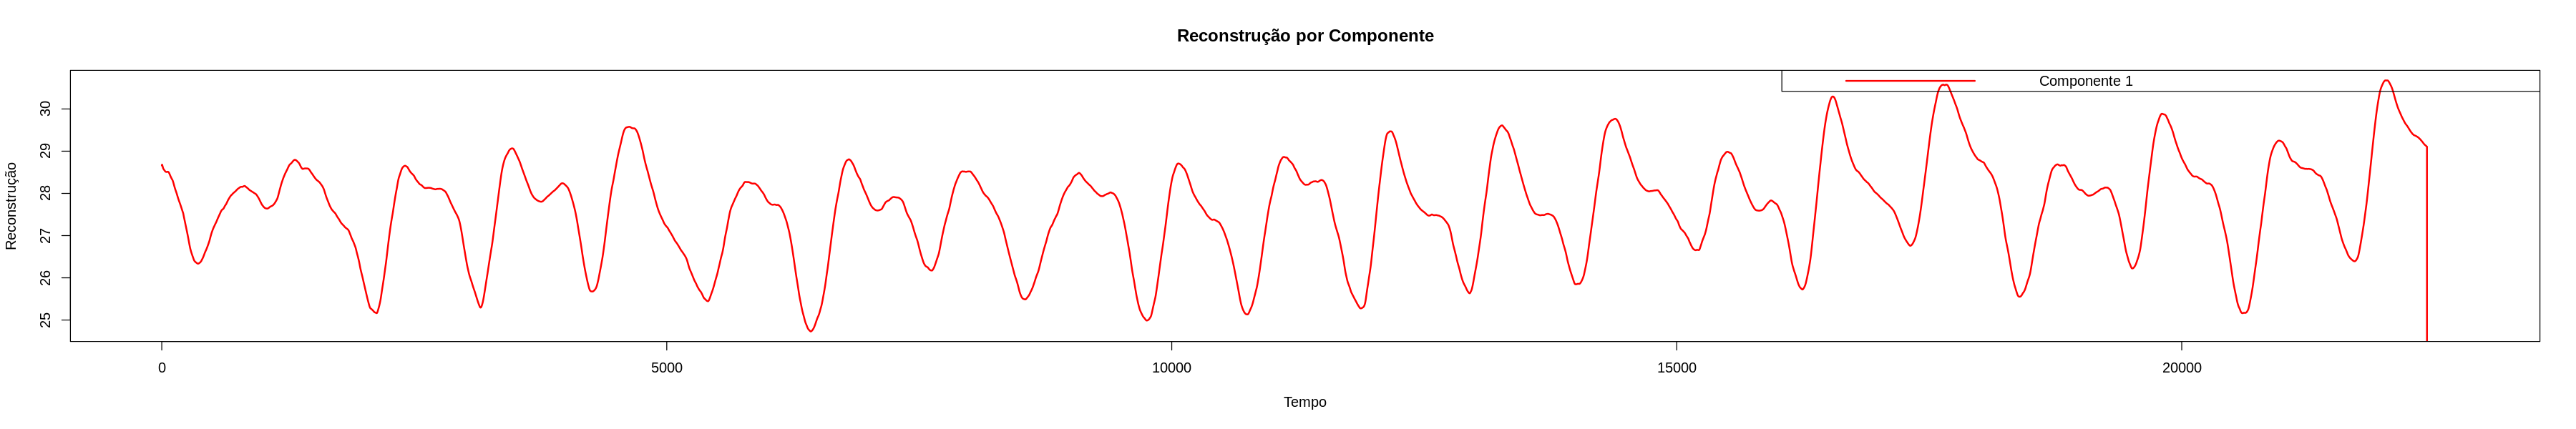

In [ ]:
ncomp_plot <- 1  # Número de componentes que você quer plotar
RSK_mat <- matrix(0.0, nrow=ndat, ncol=ncomp_plot)  # Matriz para guardar cada reconstrução

for (k in 1:ncomp_plot) {
  for(i in 1:(ndat-MEM-1)) {
    if(i < MEM) {
      NORMAL <- i
      Lt <- 1
      Ut <- i
    } else {
      NORMAL <- MEM
      Lt <- 1
      Ut <- MEM
    }

    for(j in Lt:Ut) {
      RSK_mat[i, k] <- RSK_mat[i, k] + PC[i-j+1, k] * Autovetores[j, k]
    }

    RSK_mat[i, k] <- RSK_mat[i, k] / NORMAL
  }
}

# Função auxiliar para encontrar intervalo ignorando zeros
get_ylim_no_zeros <- function(vec) {
  vals <- vec[vec != 0]
  if (length(vals) == 0) {
    return(range(vec))  # Se só tem zeros, retorna range normal
  } else {
    return(range(vals))
  }
}

# Calcula os limites para cada componente, depois junta para um ylim geral
ylim_min <- min(sapply(1:ncomp_plot, function(k) get_ylim_no_zeros(RSK_mat[, k])))
ylim_max <- max(sapply(1:ncomp_plot, function(k) get_ylim_no_zeros(RSK_mat[, k])))

matplot(RSK_mat, type = "l", lty = 1, lwd = 2, col = rainbow(ncomp_plot),
        xlab = "Tempo", ylab = "Reconstrução", main = "Reconstrução por Componente",
        ylim = c(ylim_min, ylim_max))
legend("topright", legend = paste("Componente", 1:ncomp_plot),
       col = rainbow(ncomp_plot), lty = 1, lwd = 2)


##COMENTÁRIO

Ao reconstruir a serie utilizando apenas a componente principal podemos objservar um grafico com picos e vales mais regulares represenanto a sazonalidade anual.

### 5 Componetes Pincipais

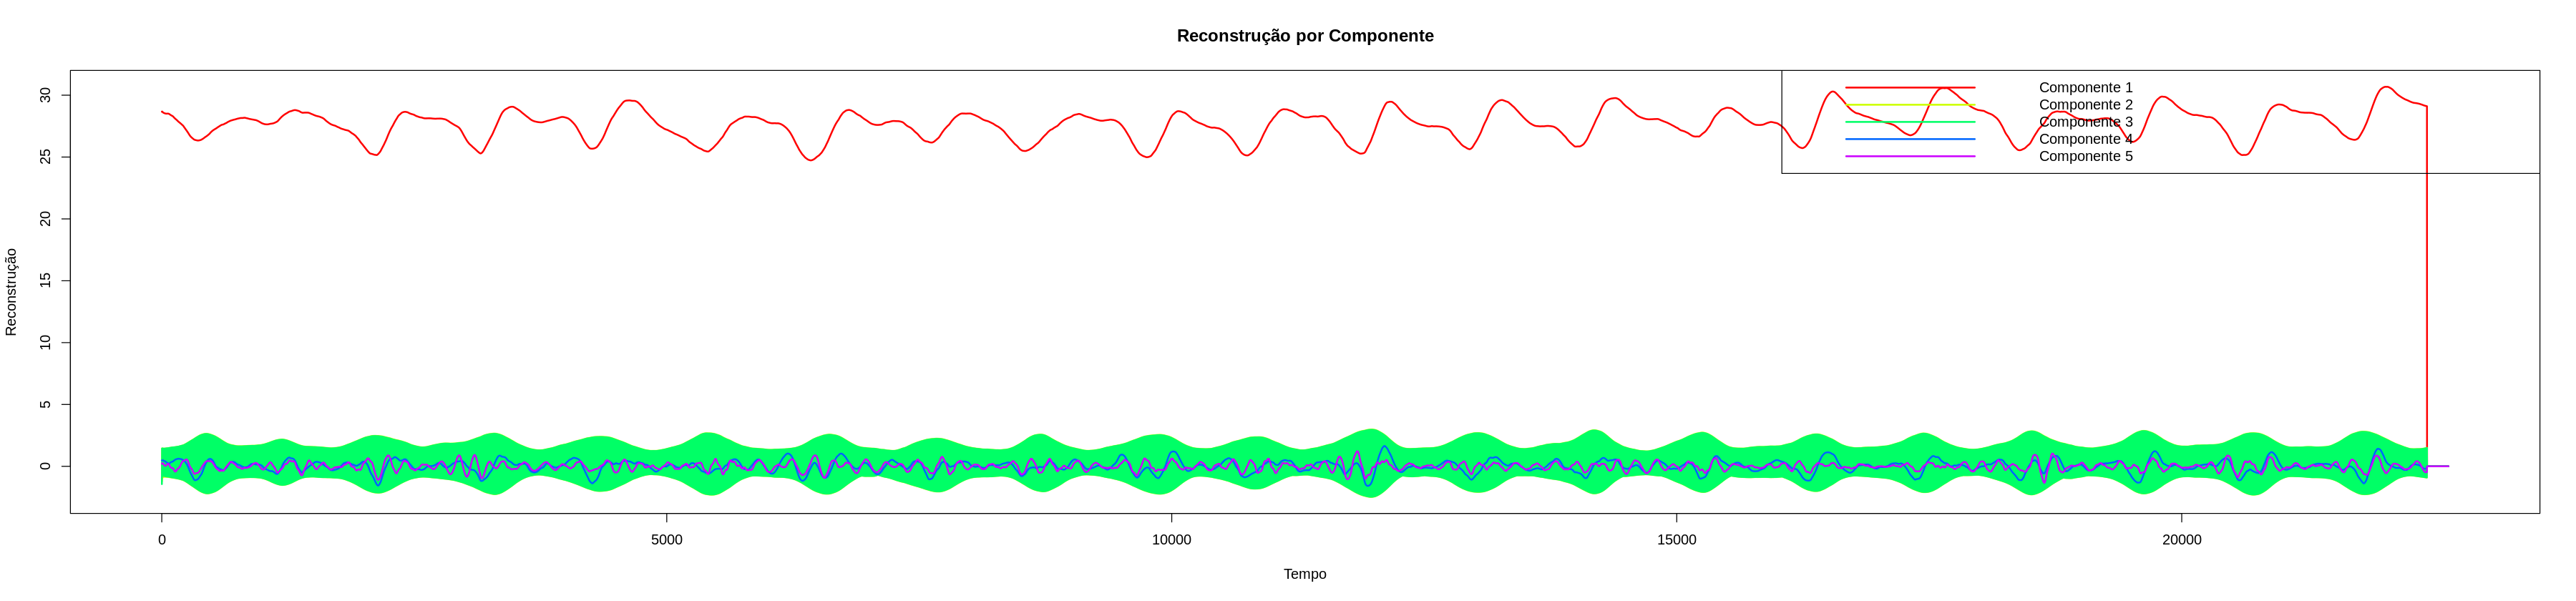

In [ ]:
ncomp_plot <- 5  # Número de componentes que você quer plotar
RSK_mat <- matrix(0.0, nrow=ndat, ncol=ncomp_plot)  # Matriz para guardar cada reconstrução

for (k in 1:ncomp_plot) {
  for(i in 1:(ndat-MEM-1)) {
    if(i < MEM) {
      NORMAL <- i
      Lt <- 1
      Ut <- i
    } else {
      NORMAL <- MEM
      Lt <- 1
      Ut <- MEM
    }

    for(j in Lt:Ut) {
      RSK_mat[i, k] <- RSK_mat[i, k] + PC[i-j+1, k] * Autovetores[j, k]
    }

    RSK_mat[i, k] <- RSK_mat[i, k] / NORMAL
  }
}

# Função auxiliar para encontrar intervalo ignorando zeros
get_ylim_no_zeros <- function(vec) {
  vals <- vec[vec != 0]
  if (length(vals) == 0) {
    return(range(vec))  # Se só tem zeros, retorna range normal
  } else {
    return(range(vals))
  }
}

# Calcula os limites para cada componente, depois junta para um ylim geral
ylim_min <- min(sapply(1:ncomp_plot, function(k) get_ylim_no_zeros(RSK_mat[, k])))
ylim_max <- max(sapply(1:ncomp_plot, function(k) get_ylim_no_zeros(RSK_mat[, k])))

matplot(RSK_mat, type = "l", lty = 1, lwd = 2, col = rainbow(ncomp_plot),
        xlab = "Tempo", ylab = "Reconstrução", main = "Reconstrução por Componente",
        ylim = c(ylim_min, ylim_max))
legend("topright", legend = paste("Componente", 1:ncomp_plot),
       col = rainbow(ncomp_plot), lty = 1, lwd = 2)


## COMENTARIO

A titulo de curiosidade quando adcionamos no grafico as 5 componentes principais de forma independente podemos objservar a "distancia" entre a 1º componente para as demis evidnciando que a partir da segunda componente temos apenas ruidos.

---

## Reconstrução da Série Temporal pela Análise SSA X Original

Este trecho realiza a reconstrução da série temporal original utilizando a primeira componente extraída da Análise de Componentes Singulares (SSA).

- `Qcomp` define quantas componentes principais serão consideradas na reconstrução.
- A reconstrução é feita somando as contribuições das componentes selecionadas, ponderadas pelos autovetores correspondentes.
- A normalização ajusta a soma para evitar distorções nas bordas da série.
- Por fim, o gráfico compara visualmente a série original com a série reconstruída, facilitando a avaliação da qualidade da reconstrução.


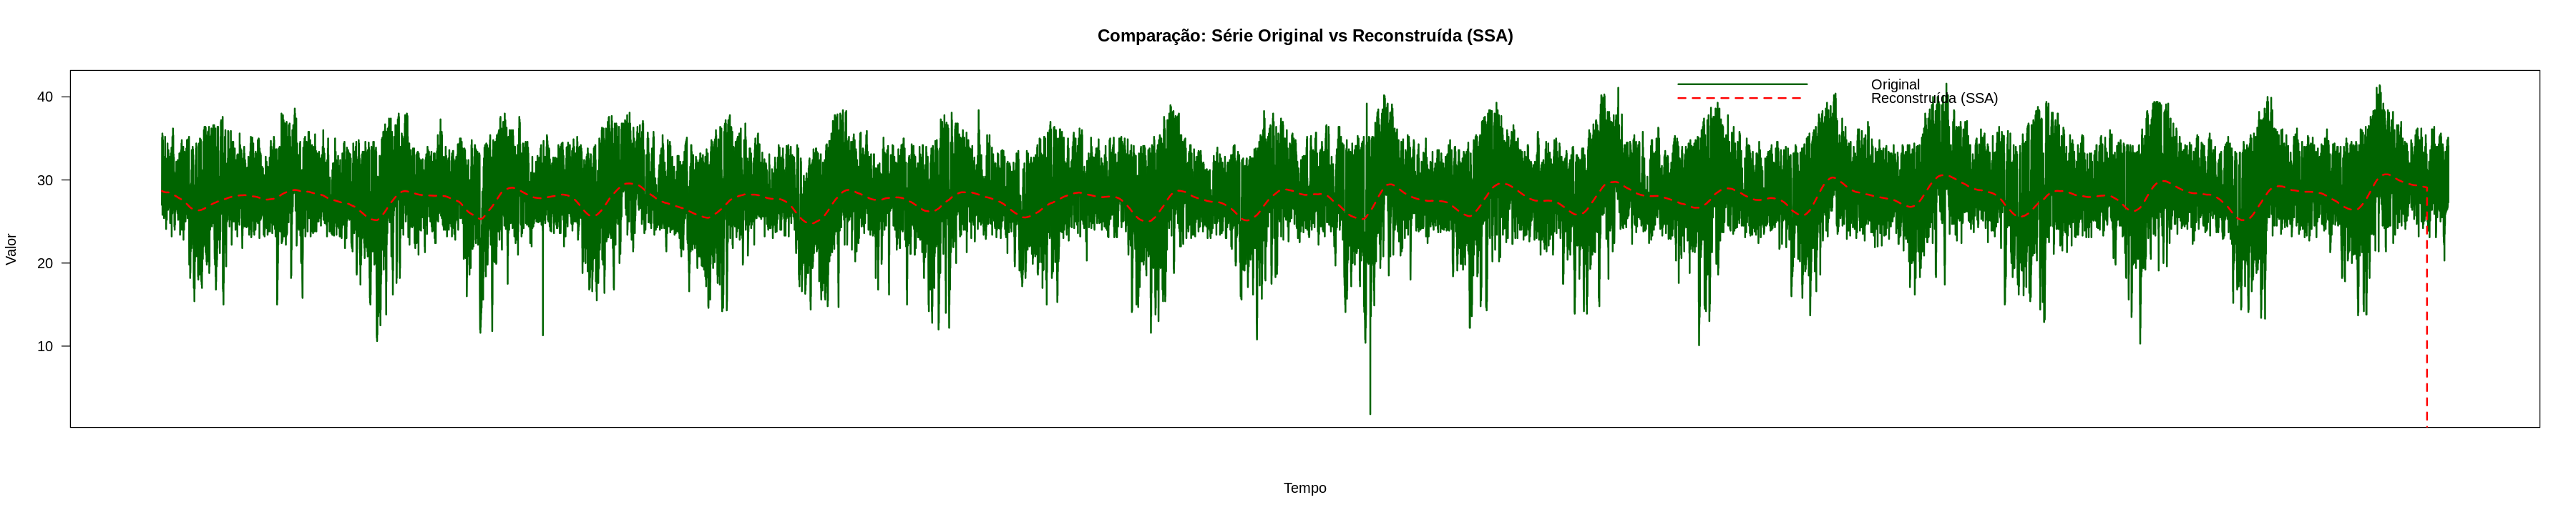

In [ ]:
# -----------------------------------------------------------
# RECONSTRUÇÃO DA SÉRIE TEMPORAL:
# -----------------------------------------------------------
Qcomp <- 1   # Quantidade de componentes a usar na reconstrução
RSK <- rep(0.0, times=ndat)  # Inicializa vetor de reconstrução

for(i in 1:(ndat-MEM-1)) {
  # Ajusta os limites para normalização dependendo da posição
  if(i < MEM) {
    NORMAL <- i
    Lt <- 1
    Ut <- i
  } else {
    NORMAL <- MEM
    Lt <- 1
    Ut <- MEM
  }

  # Reconstroi a série usando as componentes selecionadas
  for(k in 1:Qcomp) {
    for(j in Lt:Ut) {
      RSK[i] <- RSK[i] + PC[i-j+1,k]*Autovetores[j,k]
    }
  }

  RSK[i] <- RSK[i]/NORMAL # Normaliza o valor reconstruído
}


# Criar eixo x
xs <- 1:ndat

# Ajustar tamanho do gráfico (igual ao código Fourier)
options(repr.plot.width = 30, repr.plot.height = 6)

# Plotar série original e reconstruída no mesmo gráfico
plot(xs, dados$V1, type = "l", col = "darkgreen", lwd = 2,
     main = "Comparação: Série Original vs Reconstruída (SSA)",
     xlab = "Tempo", ylab = "Valor",
     xaxt = "n", yaxt = "n")  # Oculta eixos para personalizar depois

axis(2, las = 1, col = "black")  # Eixo Y

# Adiciona a série reconstruída
lines(xs, RSK, col = "red", lwd = 2, lty = 2)

# Adiciona legenda
legend("topright", legend = c("Original", "Reconstruída (SSA)"),
       col = c("darkgreen", "red"), lwd = 2, lty = c(1, 2), bty = "n")

# Converter em data.frame com cabeçalho "X" e salvar como CSV
df_reconstruida <- data.frame(X = RSK)
nome_arquivo <- paste0("serie_reconstruida_SSA_Q", Qcomp, ".csv")
write.csv(df_reconstruida, file = nome_arquivo, row.names = FALSE)

## COMENTARIO.

Esta visualização complementar mostra o quanto a análise SSA "limpa" a serie temporal permitindo uma maior evidenicia dos ciclos anuais e as tendencias de logo prazzo de anos mais quentes ou mais frios, por exempplo.

---

# 🔍4 Visualização do Atrator 3D da Série Reconstruída

Agora, reconstituímos o atrator tridimensional com base na série filtrada (reconstruída).

**Objetivo:**  
- Calcular o parâmetro `τ` a partir da série reconstruida
e `m` para gerar o atrator da série reconstruída  
- Comparar com o atrator da série original




## Tempo de defasagem (`τ`) Série Reconstruida

In [ ]:
# OBS: Os dados devem estar dispostos em duas colunas com headers A e B

#Exemplo com Temperatura
info_mutua <- data.frame(A = df_reconstruida$X, B = df_reconstruida$X)

# Print the head of the new data frame
head(info_mutua) # Use head() to display the first few rows of the data frame

,A,B
,<dbl>,<dbl>
1,28.65891,28.65891
2,28.67618,28.67618
3,28.68135,28.68135
4,28.67028,28.67028
5,28.66574,28.66574
6,28.66023,28.66023


Número total de pontos de dados: 22641 
Número de intervalos (bins): 20 
Máximo atraso (tao) testado: 2000 
Intervalo de valores para A: [ 0 , 30.67677 ]
Intervalo de valores para B: [ 0 , 30.67677 ]
Iniciando cálculo da Informação Mútua para tao de -2000 a 2000 ...
  Processado tao = -2000 , MI = 0.1228 
  Processado tao = -1990 , MI = 0.1177 
  Processado tao = -1980 , MI = 0.1142 
  Processado tao = -1970 , MI = 0.1124 
  Processado tao = -1960 , MI = 0.111 
  Processado tao = -1950 , MI = 0.1103 
  Processado tao = -1940 , MI = 0.1109 
  Processado tao = -1930 , MI = 0.1128 
  Processado tao = -1920 , MI = 0.1131 
  Processado tao = -1910 , MI = 0.1122 
  Processado tao = -1900 , MI = 0.1113 
  Processado tao = -1890 , MI = 0.1125 
  Processado tao = -1880 , MI = 0.1162 
  Processado tao = -1870 , MI = 0.1204 
  Processado tao = -1860 , MI = 0.1242 
  Processado tao = -1850 , MI = 0.1272 
  Processado tao = -1840 , MI = 0.1283 
  Processado tao = -1830 , MI = 0.1275 
  Processado t

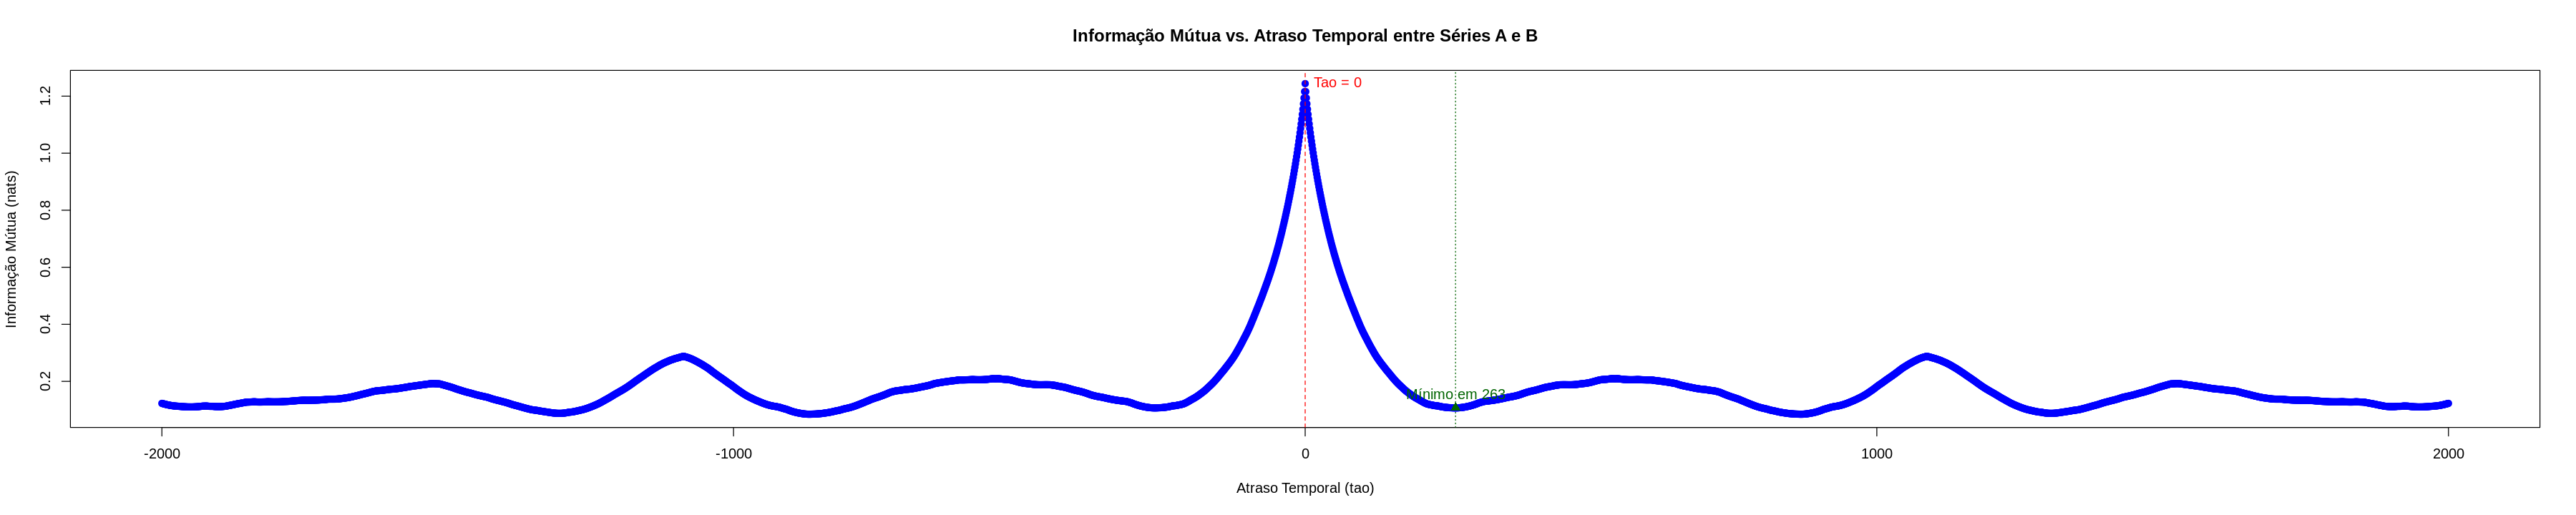

In [ ]:

# CÁLCULO DA INFORMAÇÃO MÚTUA COM ATRASO TEMPORAL (TIME-LAGGED)
#--------------------------------------------------------------------------
# Objetivo: Calcular a Informação Mútua entre duas séries temporais (A e B)
#           para diferentes atrasos temporais (tao), a fim de encontrar o
#           atraso que maximiza a dependência estatística entre elas.
#
# Input: Um data frame chamado 'info_mutua' deve existir no ambiente R.
#        Este data frame deve conter duas colunas nomeadas exatamente "A" e "B",
#        representando as duas séries temporais.
#
# Exemplo de como 'info_mutua' deve ser:
#        A         B
#   1.2345    6.7890
#   1.3456    6.5678
#   1.1111    6.9999
#   ...       ...
#
# Output:
#   - Impressão do valor máximo da Informação Mútua encontrado.
#   - Impressão do valor do atraso (tao) onde a IM foi máxima.
#   - Um gráfico da Informação Mútua vs. Atraso (tao).
#   - Um arquivo de texto "Inf_Mutua_Resultados.txt" com os valores de
#     tao e da Informação Mútua (potencialmente renormalizada).
#--------------------------------------------------------------------------

# --- CONFIGURAÇÃO INICIAL ---

# Assume que o data frame 'info_mutua' já está carregado no ambiente R.
# Se precisar ler de um arquivo (ex: CSV separado por tabulação com cabeçalho):
# setwd("C:/Caminho/Para/Sua/Pasta") # Define o diretório de trabalho
# data <- read.csv('nome_do_arquivo.txt', header = TRUE, sep = "\t")
# colnames(data) <- c("A", "B") # Garante que os nomes das colunas são A e B

# Usaremos 'data' como o nome do data frame daqui em diante
data <- info_mutua # Certifique-se que 'info_mutua' existe!

num_points <- nrow(data) # Número total de pontos de dados em cada série

# --- PARÂMETROS ---

# Número de intervalos (bins) para discretizar os dados.
# Um número maior captura mais detalhes, mas exige mais dados.
num_bins <- 20

# Máximo atraso temporal (tao) a ser testado (positivo e negativo).
# O código testará atrasos de -max_lag até +max_lag.
max_lag <- 2000

# Validação inicial: verificar se há dados suficientes
if (num_points <= max_lag) {
  stop("Erro: Número de pontos de dados insuficiente para o max_lag definido.")
}
if (ncol(data) < 2 || !all(c("A", "B") %in% colnames(data))) {
    stop("Erro: O data frame 'data' deve ter colunas chamadas 'A' e 'B'.")
}


cat("Número total de pontos de dados:", num_points, "\n")
cat("Número de intervalos (bins):", num_bins, "\n")
cat("Máximo atraso (tao) testado:", max_lag, "\n")

# --- CÁLCULO DOS LIMITES E LARGURA DOS INTERVALOS ---

# Encontra os valores mínimo e máximo para as séries A e B
# Usando funções R em vez de loop para eficiência e clareza
min_A <- min(data$A, na.rm = TRUE)
max_A <- max(data$A, na.rm = TRUE)
min_B <- min(data$B, na.rm = TRUE)
max_B <- max(data$B, na.rm = TRUE)

cat("Intervalo de valores para A: [", min_A, ",", max_A, "]\n")
cat("Intervalo de valores para B: [", min_B, ",", max_B, "]\n")

# Calcula a largura de cada intervalo (bin) para A e B
# Adiciona um pequeno epsilon para garantir que o valor máximo caia no último bin
epsilon <- 1e-9 # Pequeno valor para evitar problemas de ponto flutuante
delta_A <- (max_A - min_A + epsilon) / num_bins
delta_B <- (max_B - min_B + epsilon) / num_bins

# Verifica se os intervalos têm largura > 0 (evita divisão por zero se todos os valores forem iguais)
if (delta_A <= 0 || delta_B <= 0) {
    stop("Erro: Uma das séries (A ou B) parece ter todos os valores iguais. Não é possível calcular os bins.")
}

# --- CÁLCULO DA INFORMAÇÃO MÚTUA PARA CADA ATRASO (tao) ---

# Vetor para armazenar os resultados da Informação Mútua para cada tao
# O tamanho é 2*max_lag + 1 para cobrir de -max_lag a +max_lag, incluindo 0.
mutual_info_results <- rep(0.0, times = 2 * max_lag + 1)
lags_tested <- -max_lag:max_lag # Vetor com os valores de tao que serão testados

cat("Iniciando cálculo da Informação Mútua para tao de", -max_lag, "a", max_lag, "...\n")

# Loop principal: itera sobre cada valor de atraso (tao)
for (tao_index in 1:length(lags_tested)) {

  tao <- lags_tested[tao_index]

  # --- Inicialização das contagens para o tao atual ---
  # Vetores para contagem de ocorrências em cada bin para A e B (Histogramas Marginais)
  count_A <- rep(0, times = num_bins)
  count_B <- rep(0, times = num_bins)
  # Matriz para contagem de ocorrências conjuntas (Histograma Conjunto)
  count_AB <- matrix(0, nrow = num_bins, ncol = num_bins)

  # Número de pares (A[t], B[t+tao]) que serão comparados para este tao específico
  num_comparisons <- 0

  # --- Contagem de ocorrências nos bins (Discretização) ---
  # O loop itera sobre os índices 't' da série temporal A
  # Os limites do loop garantem que tanto t quanto t+tao estejam dentro dos limites dos dados

  if (tao >= 0) {
    # Para tao >= 0, comparamos A[t] com B[t + tao]
    # t vai de 1 até num_points - tao
    for (t in 1:(num_points - tao)) {
      index_A <- t
      index_B <- t + tao

      # Pega os valores atuais
      value_A <- data$A[index_A]
      value_B <- data$B[index_B]

      # Encontra o índice do bin para A e B
      # floor(...) garante que obtenhamos um índice inteiro de 0 a num_bins-1
      # +1 ajusta para o índice R (que começa em 1)
      bin_index_A <- floor((value_A - min_A) / delta_A) + 1
      bin_index_B <- floor((value_B - min_B) / delta_B) + 1

      # Garante que os índices estejam dentro dos limites [1, num_bins]
      # (Necessário especialmente para o valor máximo exato)
      bin_index_A <- max(1, min(bin_index_A, num_bins))
      bin_index_B <- max(1, min(bin_index_B, num_bins))

      # Incrementa as contagens
      count_A[bin_index_A] <- count_A[bin_index_A] + 1
      count_B[bin_index_B] <- count_B[bin_index_B] + 1
      count_AB[bin_index_A, bin_index_B] <- count_AB[bin_index_A, bin_index_B] + 1
      num_comparisons <- num_comparisons + 1
    }
  } else { # tao < 0
    # Para tao < 0, comparamos A[t - tao] com B[t] (equivalente a A[t'] com B[t' + tao])
    # t vai de 1 - tao até num_points
    for (t in (1 - tao):num_points) {
      index_A <- t + tao # Lembre-se que tao é negativo aqui
      index_B <- t

      # Pega os valores atuais
      value_A <- data$A[index_A]
      value_B <- data$B[index_B]

      # Encontra o índice do bin para A e B
      bin_index_A <- floor((value_A - min_A) / delta_A) + 1
      bin_index_B <- floor((value_B - min_B) / delta_B) + 1

      # Garante que os índices estejam dentro dos limites [1, num_bins]
      bin_index_A <- max(1, min(bin_index_A, num_bins))
      bin_index_B <- max(1, min(bin_index_B, num_bins))

      # Incrementa as contagens
      count_A[bin_index_A] <- count_A[bin_index_A] + 1
      count_B[bin_index_B] <- count_B[bin_index_B] + 1
      count_AB[bin_index_A, bin_index_B] <- count_AB[bin_index_A, bin_index_B] + 1
      num_comparisons <- num_comparisons + 1
    }
  }

  # --- Cálculo das Probabilidades ---
  # Normaliza as contagens pelo número total de comparações feitas *para este tao*
  if (num_comparisons > 0) {
    prob_A <- count_A / num_comparisons
    prob_B <- count_B / num_comparisons
    prob_AB <- count_AB / num_comparisons
  } else {
    # Se não houve comparações (caso extremo, talvez max_lag muito grande)
    prob_A <- rep(0, num_bins)
    prob_B <- rep(0, num_bins)
    prob_AB <- matrix(0, num_bins, num_bins)
  }

  # --- Cálculo da Informação Mútua para o tao atual ---
  mutual_info_tao <- 0.0
  for (i in 1:num_bins) {
    for (k in 1:num_bins) {
      # Verifica se as probabilidades marginais e a conjunta são maiores que zero
      # para evitar log(0) ou divisão por zero.
      if (prob_AB[i, k] > 0 && prob_A[i] > 0 && prob_B[k] > 0) {
        mutual_info_tao <- mutual_info_tao + prob_AB[i, k] * log(prob_AB[i, k] / (prob_A[i] * prob_B[k]))
      }
    }
  }

  # Armazena o resultado da Informação Mútua para este tao
  # O índice no vetor 'mutual_info_results' corresponde à posição de 'tao' em 'lags_tested'
  mutual_info_results[tao_index] <- mutual_info_tao

  # Imprime progresso (opcional, pode ser útil para execuções longas)
  if (tao %% 10 == 0) { # Imprime a cada 10 lags
      cat("  Processado tao =", tao, ", MI =", round(mutual_info_tao, 4), "\n")
  }

} # Fim do loop sobre tao

cat("Cálculo da Informação Mútua concluído.\n")

# --- ANÁLISE DOS RESULTADOS ---

# Encontra o valor máximo da Informação Mútua e o índice correspondente
max_mutual_info_value <- max(mutual_info_results, na.rm = TRUE)
max_mutual_info_index <- which.max(mutual_info_results)

# Encontra o valor do atraso (tao) que corresponde ao máximo
lag_at_max_mi <- lags_tested[max_mutual_info_index]

cat("\n--- Resultados ---\n")
cat("Valor Máximo da Informação Mútua:", max_mutual_info_value, "\n")
cat("Atraso (tao) correspondente:", lag_at_max_mi, "\n")

# --- ENCONTRA O PRIMEIRO MÍNIMO LOCAL APÓS O MÁXIMO ---
min_lag_after_peak <- NA
min_mi_value <- NA

# Começa a busca logo após o índice do pico
for (i in (max_mutual_info_index + 1):(length(mutual_info_results) - 1)) {
  if (mutual_info_results[i - 1] > mutual_info_results[i] &&
      mutual_info_results[i + 1] > mutual_info_results[i]) {

    min_lag_after_peak <- lags_tested[i]
    min_mi_value <- mutual_info_results[i]
    break
  }
}

# Mostra o resultado, se encontrado
if (!is.na(min_lag_after_peak)) {
  cat("Primeiro Valor Mínimo Positivo da Informação Mútua:", round(min_mi_value, 4), "\n")
  cat("Atraso (tao) correspondente:", min_lag_after_peak, "\n")
} else {
  cat("Nenhum mínimo local encontrado após o máximo da Informação Mútua.\n")
}

# --- RENORMALIZAÇÃO (Opcional, como no código original) ---
# Esta etapa divide todos os valores de IM pelo valor máximo, forçando o pico a ser 1.
# Isso pode ser útil para comparação visual, mas altera as unidades originais da IM (nats ou bits).
# Decida se você realmente precisa disso. O padrão é manter como está (sem renormalizar).

renormalize <- FALSE # Mude para TRUE se quiser renormalizar
mutual_info_to_plot <- mutual_info_results # Por padrão, usa os valores calculados

if (renormalize && max_mutual_info_value > 0) {
  cat("Renormalizando os resultados da Informação Mútua (pico = 1).\n")
  mutual_info_to_plot <- mutual_info_results / max_mutual_info_value
  # Atualiza o valor máximo reportado se renormalizado (será 1)
  # max_mutual_info_value <- 1.0
} else if (renormalize) {
    cat("Aviso: Não foi possível renormalizar pois o máximo IM é zero ou negativo.\n")
}


# --- PLOTAGEM DOS RESULTADOS ---

cat("Gerando gráfico da Informação Mútua vs. Atraso (tao)...\n")

plot(lags_tested, mutual_info_to_plot,
     type = "b", # 'b' para pontos e linhas
     pch = 19,   # Símbolo do ponto (círculo sólido)
     col = "blue",
     xlab = "Atraso Temporal (tao)",
     ylab = ifelse(renormalize, "Informação Mútua (Renormalizada)", "Informação Mútua (nats)"),
     main = "Informação Mútua vs. Atraso Temporal entre Séries A e B")

# Adiciona uma linha vertical no pico (onde a IM é máxima)
abline(v = lag_at_max_mi, col = "red", lty = 2) # Linha vertical tracejada vermelha
# Se encontrou o mínimo local, destaque também no gráfico
if (!is.na(min_lag_after_peak)) {
  abline(v = min_lag_after_peak, col = "darkgreen", lty = 3)
  points(min_lag_after_peak, min_mi_value, col = "darkgreen", pch = 17, cex = 1.2)
  text(min_lag_after_peak, min_mi_value,
       labels = paste("Mínimo em", min_lag_after_peak), pos = 3, col = "darkgreen")
}
# Adiciona texto indicando o pico
text(lag_at_max_mi, max(mutual_info_to_plot, na.rm=TRUE),
     labels = paste("Tao =", lag_at_max_mi), pos = 4, col = "red") # pos=4 é à direita

# --- SALVAR RESULTADOS ---

# Cria um data frame com os resultados
results_df <- data.frame(Tao = lags_tested, Mutual_Information = mutual_info_to_plot)

# Nome do arquivo de saída
output_filename <- "Inf_Mutua_Resultados_SSA.txt"

cat("Salvando resultados em:", output_filename, "\n")
# Salva em um arquivo de texto separado por espaços
write.table(results_df,
            file = output_filename,
            sep = " ",           # Separador de colunas
            row.names = FALSE,   # Não incluir nomes das linhas
            col.names = TRUE,    # Incluir nomes das colunas (Tao, Mutual_Information)
            quote = FALSE,       # Não colocar aspas em torno dos valores/nomes
            eol = "\n")          # Fim de linha padrão

cat("--- Fim do Script ---\n")

## COMENTÁRIO

Considerando a grande mudança da serie após a análise SSA foi novamente calculado o tempo de defasagem. Assim com a série tratada temos um tempo de defasagem de 263 que deverá gerar um atrotor que evidencie os ciclos anuais da serie.

## Espaço de Fase da Série Reconstruida

Nesta etapa, a série temporal **Reconstruida** é transformada em um espaço de fase, permitindo a visualização da dinâmica do sistema em múltiplas dimensões.

In [ ]:
# 1. Criar uma série temporal de exemplo
#set.seed(123)
#serie_temporal <- sin(1:1000 * 0.05) + rnorm(1000, 0, 0.1)

#Dados Reais
serie_temporal <- RSK

# 2. Definir parâmetros de reconstrução
#atraso <- 8   # tau - caso queira definir o valor
atraso <- min_lag_after_peak #Atraso TAO obtido no CÁLCULO DA INFORMAÇÃO MÚTUA COM ATRASO TEMPORAL (TIME-LAGGED)

dimensao <- 3  # m - caso queira definir o valor
#dimensao <- saturou_em #Calculo d dimensão de correlação (D2) para diferentes dimensões de embedding (m)

# 3. Função para reconstruir o espaço de fase
reconstruir_espaco_fase <- function(serie, dimensao, atraso) {
  n <- length(serie)
  max_indice <- n - (dimensao - 1) * atraso
  if (max_indice <= 0) {
    stop("A série é muito curta para a combinação de 'dimensao' e 'atraso' fornecidos.")
  }
  matriz_embed <- sapply(0:(dimensao - 1), function(i) {
    serie[seq(1 + i * atraso, length.out = max_indice)]
  })
  colnames(matriz_embed) <- paste0("T", 1:dimensao)
  as.data.frame(matriz_embed)
}

# 4. Aplicar a função para obter o espaço de fase
espaco_fase_df <- reconstruir_espaco_fase(serie_temporal, dimensao, atraso)

# Imprimir os valores utilizados
cat("Valor de atraso (tau):", atraso, "\n")
cat("Valor de dimensão (m):", dimensao, "\n")

# Mostrar as primeiras linhas do espaço de fase
head(espaco_fase_df)

# Salvar o DataFrame em um arquivo CSV
write.csv(espaco_fase_df, "espaco_fase.csv", row.names = FALSE)

Valor de atraso (tau): 263 
Valor de dimensão (m): 3 


,T1,T2,T3
,<dbl>,<dbl>,<dbl>
1,28.65891,26.91653,27.26083
2,28.67618,26.90322,27.26655
3,28.68135,26.89013,27.27171
4,28.67028,26.87714,27.27679
5,28.66574,26.86389,27.28192
6,28.66023,26.85081,27.28640


## 📊 Gráfico 3D Série Reconstruída - Reconstrução do espaço de fase

**Visualizar o espaço de fase em 3D.** Embora o espaço reconstruído pode ter mais de 3 dimensões, é possivel escolher **3 quaisquer** dimensões para gerar o gráfico 3D.

O gráfico ajuda a:
- Detectar **atratores** (como o atrator de Lorenz ou atratores estranhos).
- Avaliar **padrões recorrentes** no comportamento da série.
- Ter uma **intuição visual** sobre a estrutura do sistema dinâmico.
---

In [ ]:
# Use system() to execute shell commands in R
system("sudo apt-get update")
system("sudo apt-get install pandoc -y")


# Criar gráfico com plotly (usando espaco_fase_df)
grafico_3d <- plot_ly(
  data = espaco_fase_df,
  x = ~T1, y = ~T2, z = ~T3,
  type = 'scatter3d',
  mode = 'markers',
  marker = list(size = 2, color = 'darkgoldenrod')
) %>%
  layout(
    scene = list(
      xaxis = list(title = "T(t)"),
      yaxis = list(title = "T(t+τ)"),
      zaxis = list(title = "T(t+2τ)")
    )
  )
# Salvar como HTML
htmlwidgets::saveWidget(grafico_3d, "grafico_3d_SSA.html", selfcontained = TRUE)

# Mensagem informando o caminho
cat("\n✅ Gráfico 3D salvo com sucesso como 'grafico_3d_SSA.html'\n")
cat("
📥 Como baixar o gráfico `grafico_3d_SSA.html` no Google Colab:

1. Clique no ícone de 📂 Arquivos (barra lateral esquerda do Colab).
2. Encontre o arquivo grafico_3d_SSA.html na lista.
3. Clique com o botão direito sobre o arquivo.
4. Selecione \"Download\".

💡 Dica: o gráfico será interativo ao abrir no navegador!
")


✅ Gráfico 3D salvo com sucesso como 'grafico_3d_SSA.html'

📥 Como baixar o gráfico `grafico_3d_SSA.html` no Google Colab:

1. Clique no ícone de 📂 Arquivos (barra lateral esquerda do Colab).
2. Encontre o arquivo grafico_3d_SSA.html na lista.
3. Clique com o botão direito sobre o arquivo.
4. Selecione "Download".

💡 Dica: o gráfico será interativo ao abrir no navegador!


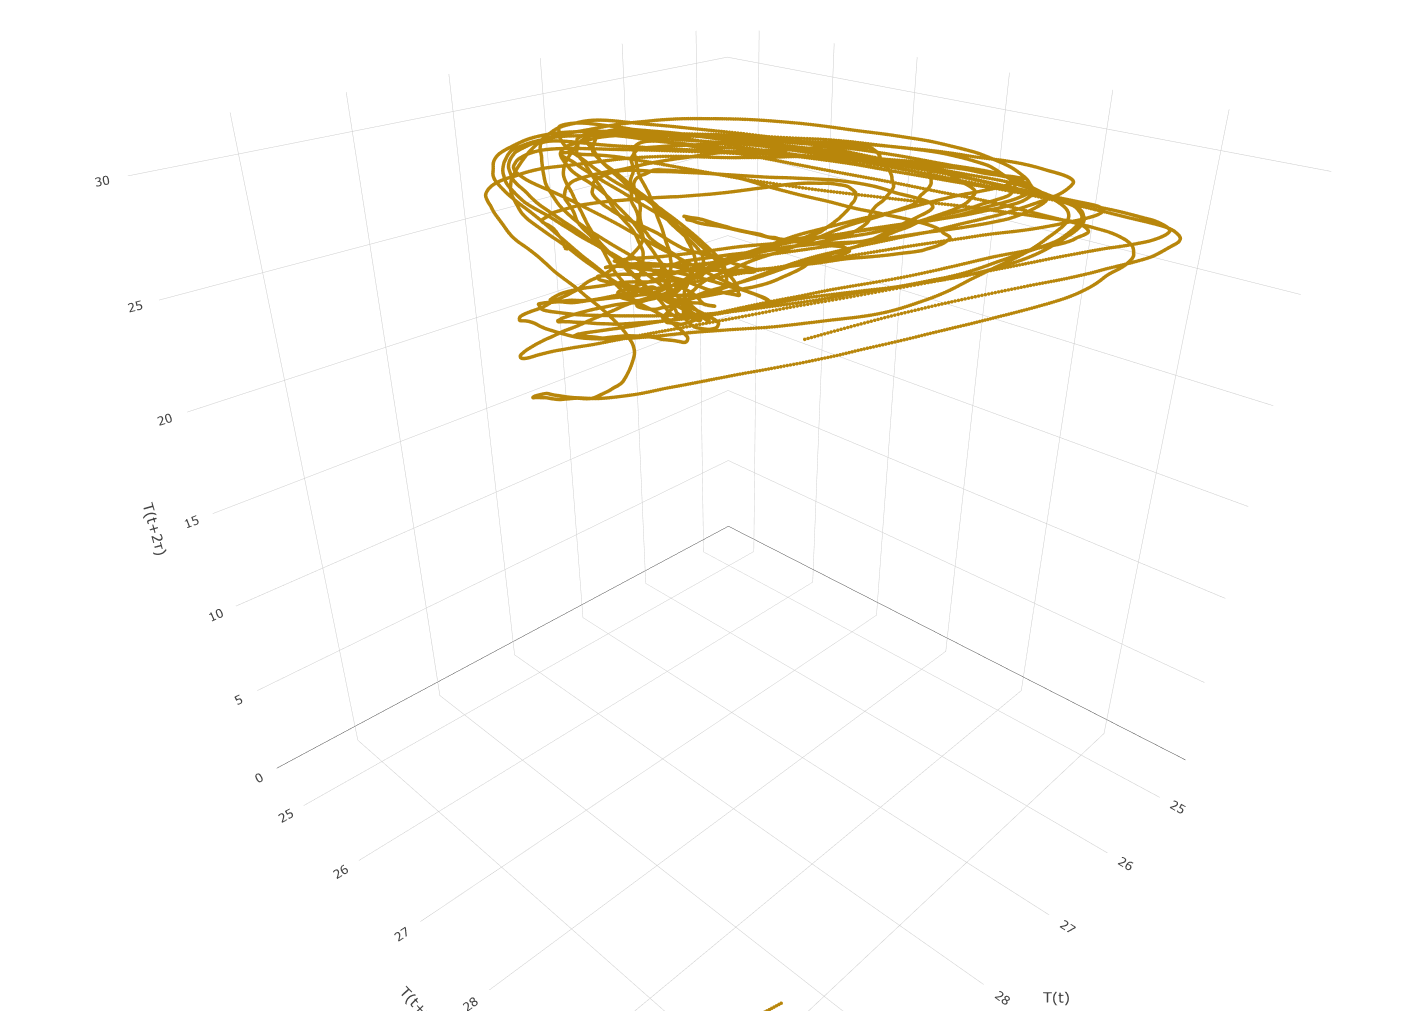

## COMENTÁRIO

O gráfico mostra o atrator reconstruído após o tratamento da série de temperatura com a análise SSA. Diferente do primeiro gráfico (com os dados originais), aqui a forma ficou muito mais organizada e suave. Isso acontece porque a SSA separou e manteve apenas as variações mais lentas e importantes da série, como os ciclos sazonais e tendências gerais, enquanto reduziu o ruído e as oscilações rápidas (como as variações dentro do mesmo dia).

Por isso, o atrator agora mostra um padrão mais limpo e contínuo, representando melhor a evolução dos comportamentos principais da temperatura ao longo do tempo. A forma do gráfico sugere que existe um ciclo dominante (provavelmente sazonal), com pequenas variações superpostas. Esse tipo de análise ajuda a entender a estrutura da série de forma mais clara, isolando os padrões de interesse.

A comparação entre os atratores mostra o quanto da estrutura dinâmica do sistema é preservada pela reconstrução com o 1º componente. Essa sequência é útil para:

- Redução de ruído
- Compressão de informação
- Interpretação de padrões dominantes

---

# 5 Análise de Wavelet
A análise de wavelets é uma ferramenta fundamental para o estudo de sinais intermitentes, complexos e auto-similares, funcionando como um "microscópio matemático" capaz de focar numa parte específica do sinal para extrair estruturas locais e singularidades.

---

Loading required package: WaveletComp

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘WaveletComp’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘WaveletComp’


The following object is masked from ‘package:ggplot2’:

    arrow




[1] 22641
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


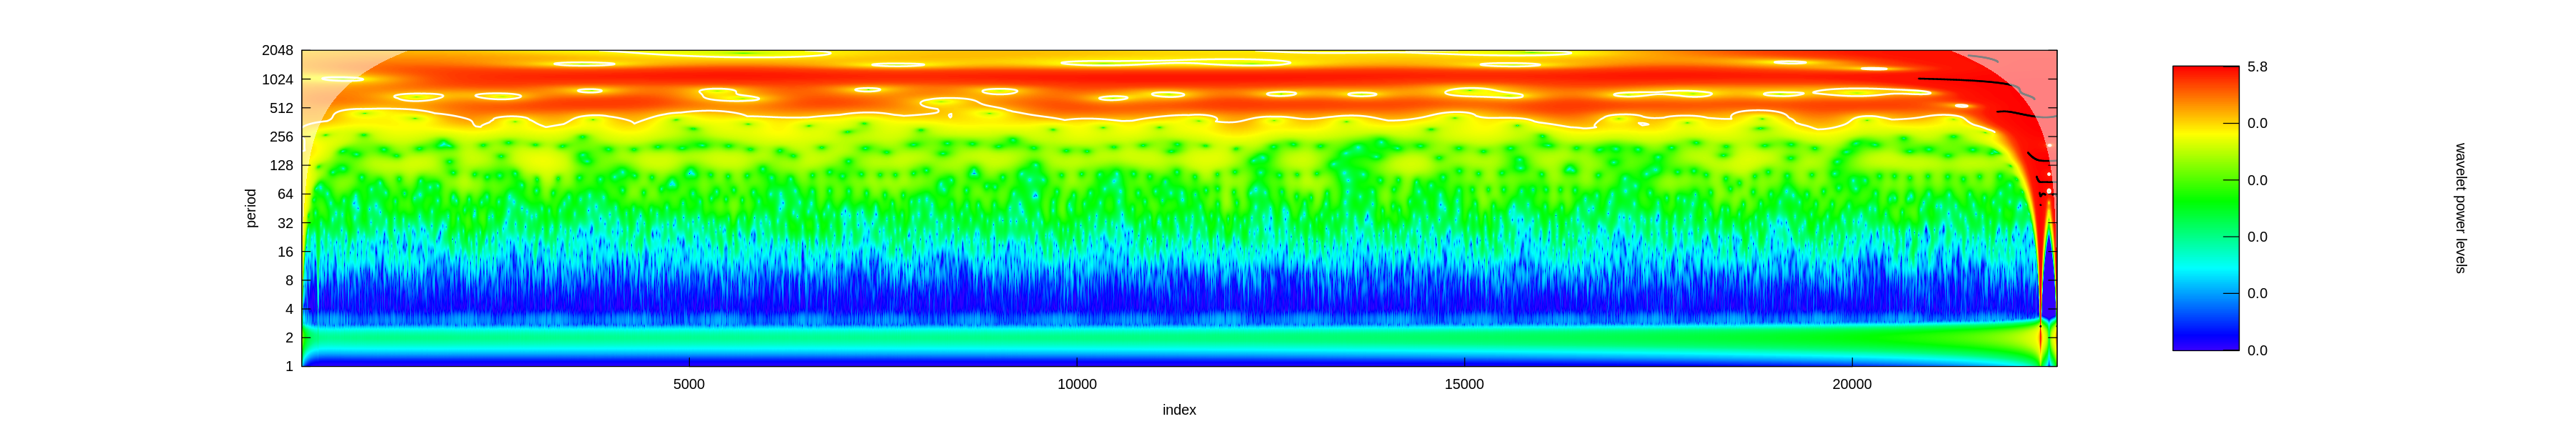

In [ ]:
## CÓDIGO WAVELET

## CÓDIGO WAVELET

# Instala e carrega o pacote WaveletComp
# Use install.packages() para instalar se necessario
if (!require(WaveletComp)) {
  install.packages("WaveletComp")
  library(WaveletComp)
} else {
  library(WaveletComp) # Carrega o pacote se ja estiver instalado
}

options(repr.plot.width = 30, repr.plot.height = 5)

#setwd("C:/Users/Usuario/Desktop/BKP 8429/Users/Sérgio Roberto/Documents/FisicaAmbiental/Wavelet")

require(WaveletComp)


#x <- read.csv('elnino_1d.txt',header = TRUE)

#x <- data.frame(X = dados$V1)
x <- data.frame(X = RSK)


print(nrow(x))


my.data <- data.frame(x = x)
my.w <- analyze.wavelet(my.data,
	loess.span = 0,
	dt = 1, dj = 1/250,
	lowerPeriod = 1,
	upperPeriod = 2048,
	make.pval = TRUE, n.sim = 10)
wt.image(my.w, n.levels = 250,
	legend.params = list(lab = "wavelet power levels") )

## COMENTÁRIO

Este gráfico mostra que a série de temperatura tem vários ciclos ao mesmo tempo:

* No topo (vermelho forte), vemos que existem componentes persistentes de longo período, o que indica tendências ou ciclos de baixa frequência (provavelmente o ciclo sazonal e variações interanuais).

* No meio (área verde/amarela), aparecem componentes com períodos intermediários. Parte dessa estrutura pode ser ruído climático (frentes, variações semanais, oscilações atmosféricas locais).

* Na base (parte azul intensa), há muita atividade de alta frequência — isso provavelmente está relacionado àquelas oscilações rápidas (as 3 medidas diárias), variação intra-diária.

* O contorno branco delimita as regiões onde a transformada wavelet é mais confiável (dentro da chamada cone of influence).

O gráfico apresenta a análise espectral por transformada contínua de wavelet da série de temperatura. Observa-se a presença de componentes de longo período com alta potência (em vermelho), indicando ciclos sazonais e possíveis variações interanuais. Nas escalas intermediárias, há oscilações com menor potência, enquanto na base do gráfico predominam as variações de alta frequência associadas às medições intra-diárias. A análise wavelet permite visualizar como esses diferentes componentes variam no tempo, evidenciando a complexidade da dinâmica térmica observada.



# Execução Finalizada

In [ ]:
# prompt: lista os aqruvos gerados em /content a partir da execução do sódigo. Mostra com um print bem formatado excluido o arquivo "- sample_data" que é apenas um exemplo de dados

# Lista todos os arquivos no diretório /content
files <- list.files("/content")

# Filtra os arquivos para excluir o "- sample_data" e outros arquivos indesejados
# Você pode adicionar mais padrões para excluir se necessário
filtered_files <- files[!grepl("sample_data$", files) & files != ""]

# Imprime os arquivos encontrados de forma formatada
if (length(filtered_files) > 0) {
  cat("Arquivos gerados:\n")
  for (file in filtered_files) {
    cat("- ", file, "\n")
  }
} else {
  cat("Nenhum arquivo relevante gerado em /content (excluindo - sample_data).\n")
}

Arquivos gerados:
-  Autovalores.txt 
-  Componentes Principais 
-  espaco_fase.csv 
-  grafico_3d_SSA.html 
-  grafico_3d.html 
-  Inf_Mutua_Resultados_SSA.txt 
-  Inf_Mutua_Resultados.txt 
-  serie_reconstruida_SSA_Q1.csv 


In [ ]:
tempo <- as.numeric(difftime(Sys.time(), inicio, units = "secs"))
minutos <- floor(tempo / 60)
segundos <- round(tempo %% 60)

cat("Tempo de execução:", minutos, "minutos e", segundos, "segundos\n")

Tempo de execução: 30 minutos e 12 segundos
